# 데이터 및 라이브러리 불러와서 확인하기

In [1]:
import warnings
import pandas as pd

pd.set_option('display.max_row', 55)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
from sklearn import metrics
import numpy as np

def lg_nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    all_nrmse = []
    for idx in range(len(preds[0])): # ignore 'ID'
        rmse = metrics.mean_squared_error(gt[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(gt[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:14])
    return score

# Feature tools로 변수 조작하기

In [3]:
# 설치 후 재시작 필요 (로컬에서는 한 번만)
# !pip install featuretools 
import featuretools as ft

from featuretools.selection import (
    remove_highly_correlated_features,
    remove_single_value_features,
)


In [4]:
from os.path import join as pjoin
data_dir = os.getcwd()

file_path = {
    'train_data' : pjoin(data_dir, 'train.csv'),
    'test_data' : pjoin(data_dir, 'test.csv')
}

In [5]:
import os
current_path = os.getcwd()

# feature tools에서 조작을 위해 컬럼명 변경 진행 안하고 시작

train_df = pd.read_csv(file_path['train_data'])
test_df = pd.read_csv(file_path['test_data'])

# 훈련데이터 프레임 컬럼명을 바꿔주기
x_features = pd.read_csv(current_path + '/meta/x_feature_info.csv')['설명'].values
x_features = ['ID'] + list(x_features)
y_features = pd.read_csv(current_path + '/meta/y_feature_info.csv')['설명'].values
y_features = list(y_features)

# train_df = train_df.set_index(train_df.columns[0])
train_df.rename(columns= {c:"x_"+xf for c, xf in zip(train_df.columns[:len(x_features)], x_features)}, inplace=True)
train_df.rename(columns= {c:"y_"+yf for c, yf in zip(train_df.columns[len(x_features):], y_features)}, inplace=True)

# test_df = test_df.set_index(test_df.columns[0])
test_df.rename(columns= {c:"x_"+xf for c, xf in zip(test_df.columns[:len(x_features)], x_features)}, inplace=True)

train_df.rename(columns= {'x_ID':'ID'}, inplace=True)
test_df.rename(columns= {'x_ID':'ID'}, inplace=True)

train_df.head()

,ID,x_PCB 체결 시 단계별 누름량(Step 1),x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 1 무게,x_1차 검사 통과 여부,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_방열 재료 3 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_2차 검사 통과 여부,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_3차 검사 통과 여부,x_4차 검사 통과 여부,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도3),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4),y_신호대 잡음비 (각도5),y_신호대 잡음비 (각도6),y_신호대 잡음비 (각도7)
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,0.0,4.34,0.18,13.34,13.37,13.40,13.52,13.44,3.11,3.17,3.06,3.13,1,2.05,2.07,2.05,2.06,2.06,2.35,1.49,1.69,1.46,1.74,12.99,12.88,12.89,12.99,-16.41,-16.36,-17.03,21.20,20.99,21.28,21.09,0.29,1463,1,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256,2.056,1.456,1.680,10.502,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,0.0,4.38,0.18,13.33,13.33,13.46,13.51,13.42,2.97,3.11,2.91,3.20,1,2.10,2.10,2.10,2.10,2.17,2.28,1.49,1.67,1.45,1.66,12.92,12.87,12.89,12.93,-16.06,-16.11,-16.74,21.16,21.03,21.16,21.13,0.13,1463,1,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308,1.446,1.184,1.268,18.507,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,0.0,4.36,0.15,13.36,13.36,13.39,13.51,13.43,3.04,3.04,3.01,3.12,1,2.07,2.06,2.04,2.07,2.10,2.26,1.49,1.69,1.46,1.68,12.97,12.87,12.87,13.00,-16.16,-16.17,-16.76,21.13,21.03,21.17,21.12,0.14,1468,1,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232,1.251,0.665,0.782,14.082,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,0.0,4.33,0.21,13.30,13.33,13.39,13.51,13.40,3.05,3.01,3.02,3.08,1,2.06,2.05,2.03,2.06,2.07,2.12,1.47,1.68,1.47,1.68,12.91,12.97,12.99,12.92,-16.05,-16.03,-16.67,21.18,20.98,21.20,21.09,0.22,1469,1,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225,1.464,1.079,1.052,16.975,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,0.0,4.35,0.16,13.35,13.34,13.41,13.50,13.42,3.04,3.07,3.00,3.12,1,2.09,2.06,2.09,2.12,2.33,2.13,1.49,1.68,1.47,1.82,12.96,12.85,12.91,12.96,-16.25,-16.23,-16.85,21.16,20.96,21.18,21.10,0.22,1469,1,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762,0.983,0.646,0.689,15.047,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974


In [6]:
test_df.head()

,ID,x_PCB 체결 시 단계별 누름량(Step 1),x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 1 무게,x_1차 검사 통과 여부,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_방열 재료 3 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_2차 검사 통과 여부,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_3차 검사 통과 여부,x_4차 검사 통과 여부,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량
0,TEST_00001,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,0.0,0.0,4.37,0.15,13.38,13.40,13.50,13.53,13.46,3.27,3.32,3.18,3.39,1,2.22,2.14,2.31,2.16,2.32,2.22,1.38,1.53,1.33,1.53,12.96,12.95,12.97,12.88,-16.17,-16.17,-16.84,21.22,21.06,21.21,21.20,0.16,1469,1,1,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,TEST_00002,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,0.0,0.0,4.36,0.17,13.35,13.38,13.45,13.52,13.44,3.26,3.30,3.17,3.34,1,2.11,2.10,2.10,2.10,2.17,2.20,1.36,1.56,1.34,1.55,12.94,12.89,13.00,12.88,-15.35,-15.25,-16.01,21.21,20.99,21.26,21.15,0.27,1462,1,1,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,TEST_00003,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,0.0,0.0,4.43,0.20,13.32,13.35,13.40,13.52,13.41,3.07,3.12,3.05,3.17,1,2.13,2.10,2.29,2.15,2.24,2.26,1.50,1.69,1.47,1.71,12.93,12.90,13.02,13.01,-16.27,-16.35,-16.95,21.16,21.05,21.15,21.19,0.14,1469,1,1,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,TEST_00004,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,0.0,0.0,4.39,0.18,13.32,13.34,13.45,13.50,13.42,3.23,3.11,3.20,3.14,1,2.10,2.10,2.09,2.09,2.10,2.18,1.49,1.65,1.46,1.90,12.99,12.98,12.91,12.96,-16.06,-16.13,-16.75,21.15,21.03,21.16,21.14,0.13,1469,1,1,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,TEST_00005,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,0.0,0.0,4.38,0.12,13.38,13.39,13.45,13.50,13.46,3.17,3.20,3.04,3.20,1,2.12,2.11,2.10,2.10,2.12,2.18,1.48,1.73,1.46,1.67,13.01,12.84,12.99,13.01,-16.06,-16.17,-16.76,21.15,21.08,21.12,21.17,0.09,1469,1,1,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016


In [7]:
import numpy as np 

float_cols = train_df.dtypes[train_df.dtypes == 'float'].index
int_cols = train_df.dtypes[train_df.dtypes == 'int'].index

train_df[float_cols] = train_df[float_cols].astype(np.float32)
train_df[int_cols] = train_df[int_cols].astype(np.int32)

In [8]:
float_cols1 = test_df.dtypes[test_df.dtypes == 'float'].index
int_cols1 = test_df.dtypes[test_df.dtypes == 'int'].index

test_df[float_cols1] = test_df[float_cols1].astype(np.float32)
test_df[int_cols1] = test_df[int_cols1].astype(np.int32)

In [9]:
es = ft.EntitySet('train_data')
es = es.add_dataframe(
    dataframe_name = 'train_df',
    dataframe = train_df.drop(columns=['ID'], axis=1),
    index = train_df.columns[0],
)

es

Entityset: train_data
  DataFrames:
    train_df [Rows: 39607, Columns: 71]
  Relationships:
    No relationships

In [10]:
es1 = ft.EntitySet('test_data')
es1 = es1.add_dataframe(
    dataframe_name = 'test_df',
    dataframe = test_df.drop(columns=['ID'], axis=1),
    index = test_df.columns[0],
)

es1

Entityset: test_data
  DataFrames:
    test_df [Rows: 39608, Columns: 57]
  Relationships:
    No relationships

In [11]:
ft.list_primitives()[ft.list_primitives().type == 'aggregation']['name'].values

array(['median', 'num_true', 'entropy', 'any', 'avg_time_between',
       'trend', 'percent_true', 'max', 'num_unique', 'last', 'skew',
       'mean', 'std', 'time_since_last', 'mode', 'first', 'min',
       'time_since_first', 'all', 'n_most_common', 'sum', 'count'],
      dtype=object)

In [12]:
ft.list_primitives()[ft.list_primitives().type == 'transform']['name'].values

array(['cum_max', 'less_than_equal_to', 'diff_datetime',
       'is_working_hours', 'not_equal_scalar', 'latitude', 'quarter',
       'multiply_numeric_scalar', 'sine', 'time_since_previous', 'age',
       'equal', 'negate', 'not_equal', 'is_leap_year', 'add_numeric',
       'url_to_tld', 'greater_than', 'rolling_min', 'time_since',
       'modulo_numeric', 'isin', 'email_address_to_domain', 'less_than',
       'scalar_subtract_numeric_feature', 'equal_scalar', 'num_words',
       'minute', 'add_numeric_scalar', 'rolling_max', 'is_month_end',
       'cum_count', 'tangent', 'week', 'multiply_numeric_boolean',
       'url_to_protocol', 'greater_than_equal_to', 'rolling_trend',
       'days_in_month', 'multiply_numeric', 'haversine',
       'is_quarter_start', 'and', 'is_free_email_domain', 'geomidpoint',
       'weekday', 'is_null', 'subtract_numeric', 'is_quarter_end',
       'multiply_boolean', 'rolling_count', 'url_to_domain',
       'day_of_year', 'cum_sum', 'diff', 'less_than_scalar

In [13]:
es.dataframes[0].filter(regex='y')

,y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도3),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4),y_신호대 잡음비 (각도5),y_신호대 잡음비 (각도6),y_신호대 잡음비 (각도7)
0,2.056,1.456,1.680,10.502,29.632000,16.083000,4.276,-25.381001,-25.528999,-22.768999,23.792000,-25.469999,-25.409000,-25.304001
1,1.446,1.184,1.268,18.507,33.179001,16.736000,3.229,-26.618999,-26.523001,-22.573999,24.691000,-26.253000,-26.497000,-26.438000
2,1.251,0.665,0.782,14.082,31.801001,17.080000,2.839,-26.238001,-26.216000,-22.169001,24.649000,-26.285000,-26.215000,-26.370001
3,1.464,1.079,1.052,16.975,34.502998,17.143000,3.144,-25.426001,-25.079000,-21.764999,24.913000,-25.254000,-25.021000,-25.344999
4,0.983,0.646,0.689,15.047,32.602001,17.569000,3.138,-25.375999,-25.242001,-21.072001,25.299000,-25.072001,-25.195000,-24.974001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,1.382,1.215,1.263,10.874,29.194000,16.582001,3.410,-26.486000,-26.580999,-22.771999,24.261000,-26.490999,-26.584000,-26.580000
39603,1.482,0.606,1.083,8.759,29.858999,15.659000,3.406,-27.308001,-27.202999,-24.674000,23.427000,-27.250000,-27.334000,-27.325001
39604,1.117,1.154,0.993,13.159,24.719999,16.823000,3.215,-26.502001,-26.687000,-22.577000,24.301001,-26.388000,-26.424999,-26.601000
39605,0.895,0.187,0.477,9.123,26.412001,15.757000,4.216,-26.760000,-26.634001,-24.066000,23.305000,-26.535999,-26.750999,-26.635000


In [14]:
fm, features = ft.dfs(
    entityset=es,
    target_dataframe_name='train_df',
    features_only=False,
    agg_primitives=['mean', 'std'],
    trans_primitives=['percentile'],
    max_depth=1,
    verbose=True,
    primitive_options={ 
        ('percentile', 'mean', 'std'): {
            "include_groupby_columns": {
                "train_data": list(es.dataframes[0].filter(regex='x').columns)
                },
            'ignore_columns' : {
                "train_data": list(es.dataframes[0].filter(regex='y').columns)
                },
        }
    }
)
features

Built 140 features
Elapsed: 00:03 | Progress: 100%|██████████


[<Feature: x_PCB 체결 시 단계별 누름량(Step 1)>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_방열 재료 1 무게>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 3)>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 4)>,
 <Feature: x_방열 재료 1 면적>,
 <Feature: x_방열 재료 2 면적>,
 <Feature: x_방열 재료 3 면적>,
 <Feature: x_방열 재료 2 무게>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: x_커넥터 위치 기준 좌표>,
 <Feature: x_각 안테나 패드 위치(높이) 차이>,
 <Feature: x_1번 안테나 패드 위치>,
 <Feature: x_2번 안테나 패드 위치>,
 <Feature: x_3번 안테나 패드 위치>,
 <Feature: x_4번 안테나 패드 위치>,
 <Feature: x_5번 안테나 패드 위치>,
 <Feature: x_1번 스크류 삽입 깊이>,
 <Feature: x_2번 스크류 삽입 깊이>,
 <Feature: x_3번 스크류 삽입 깊이>,
 <Feature: x_4번 스크류 삽입 깊이>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_커넥터 1번 핀 치수>,
 <Feature: x_커넥터 2번 핀 치수>,
 <Feature: x_커넥터 3번 핀 치수>,
 <Feature: x_커넥터 4번 핀 치수>,
 <Feature: x_커넥터 5번 핀 치수>,
 <Feature: x_커넥터 6번 핀 치수>,
 <Feature: x_스크류 삽입 깊이1>,
 <Feature: x_스크류 삽입 깊이2>,
 <Feature: x_스크류 삽입 깊이3>,
 <Feature: x_스크류 삽입 깊이4>,
 <Feature: x_스크류 체결 시 분당 회전수 1>,
 <Feature: x_스크류 

In [15]:
new_fm, new_features = remove_highly_correlated_features(
    fm, features=features, pct_corr_threshold=0.85, features_to_check = list(es.dataframes[0].filter(regex='x').columns), 
    features_to_keep = list(es.dataframes[0].filter(regex='y').columns)
)
set(features) - set(new_features) 

{<Feature: x_3번 스크류 삽입 깊이>, <Feature: x_방열 재료 3 무게>, <Feature: x_5번 안테나 패드 위치>}

In [16]:
new_fm, new_features = remove_single_value_features(new_fm, features=features)
new_fm

,x_PCB 체결 시 단계별 누름량(Step 1),x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도3),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4),y_신호대 잡음비 (각도5),y_신호대 잡음비 (각도6),y_신호대 잡음비 (각도7),PERCENTILE(x_1번 스크류 삽입 깊이),PERCENTILE(x_1번 안테나 패드 위치),PERCENTILE(x_2번 스크류 삽입 깊이),PERCENTILE(x_2번 안테나 패드 위치),PERCENTILE(x_3번 스크류 삽입 깊이),PERCENTILE(x_3번 안테나 패드 위치),PERCENTILE(x_4번 스크류 삽입 깊이),PERCENTILE(x_4번 안테나 패드 위치),PERCENTILE(x_5번 안테나 패드 위치),PERCENTILE(x_Cal 투입 전 대기 시간),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 1)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 2)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 3)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 4)),PERCENTILE(x_RF1 부분 SMT 납 량),PERCENTILE(x_RF2 부분 SMT 납 량),PERCENTILE(x_RF3 부분 SMT 납 량),PERCENTILE(x_RF4 부분 SMT 납 량),PERCENTILE(x_RF5 부분 SMT 납 량),PERCENTILE(x_RF6 부분 SMT 납 량),PERCENTILE(x_RF7 부분 SMT 납 량),PERCENTILE(x_각 안테나 패드 위치(높이) 차이),PERCENTILE(x_레이돔 치수 (안테나 1번 부위)),PERCENTILE(x_레이돔 치수 (안테나 2번 부위)),PERCENTILE(x_레이돔 치수 (안테나 3번 부위)),PERCENTILE(x_레이돔 치수 (안테나 4번 부위)),PERCENTILE(x_방열 재료 1 면적),PERCENTILE(x_방열 재료 1 무게),PERCENTILE(x_방열 재료 2 면적),PERCENTILE(x_방열 재료 2 무게),PERCENTILE(x_방열 재료 3 면적),PERCENTILE(x_방열 재료 3 무게),PERCENTILE(x_스크류 삽입 깊이1),PERCENTILE(x_스크류 삽입 깊이2),PERCENTILE(x_스크류 삽입 깊이3),PERCENTILE(x_스크류 삽입 깊이4),PERCENTILE(x_스크류 체결 시 분당 회전수 1),PERCENTILE(x_스크류 체결 시 분당 회전수 2),PERCENTILE(x_스크류 체결 시 분당 회전수 3),PERCENTILE(x_스크류 체결 시 분당 회전수 4),PERCENTILE(x_실란트 본드 소요량),PERCENTILE(x_안테나 부분 레이돔 기울기),PERCENTILE(x_커넥터 1번 핀 치수),PERCENTILE(x_커넥터 2번 핀 치수),PERCENTILE(x_커넥터 3번 핀 치수),PERCENTILE(x_커넥터 4번 핀 치수),PERCENTILE(x_커넥터 5번 핀 치수),PERCENTILE(x_커넥터 6번 핀 치수),PERCENTILE(x_커넥터 위치 기준 좌표),PERCENTILE(x_하우징 PCB 안착부 1 치수),PERCENTILE(x_하우징 PCB 안착부 2 치수),PERCENTILE(x_하우징 PCB 안착부 3 치수),PERCENTILE(y_신호대 잡음비 (각도1) ),PERCENTILE(y_신호대 잡음비 (각도2) ),PERCENTILE(y_신호대 잡음비 (각도3) ),PERCENTILE(y_신호대 잡음비 (각도4) ),PERCENTILE(y_신호대 잡음비 (각도5) ),PERCENTILE(y_신호대 잡음비 (각도6) ),PERCENTILE(y_신호대 잡음비 (각도7) ),PERCENTILE(y_안테나 1 Gain 편차),PERCENTILE(y_안테나 2 Gain 편차),PERCENTILE(y_안테나 Gain 평균 (각도1) ),PERCENTILE(y_안테나 Gain 평균 (각도2)),PERCENTILE(y_안테나 Gain 평균 (각도3) ),PERCENTILE(y_안테나 Gain 평균 (각도4)),PERCENTILE(y_평균 신호대 잡음비 )
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,70.543999,103.320000,67.470001,101.891998,74.983002,29.450001,62.380001,245.710007,0.0,4.34,0.18,13.34,13.37,13.40,13.52,3.11,3.17,3.13,2.05,2.07,2.05,2.06,2.06,2.35,1.49,1.69,1.46,1.74,12.99,12.88,12.89,12.99,-16.410000,-16.360001,-17.030001,21.200001,20.990000,21.280001,21.090000,0.29,1463,9706.030273,137.043594,135.359222,147.837967,134.313477,125.605431,136.721420,125.028259,2.056,1.456,1.680,10.502,29.632000,16.083000,4.276,-25.381001,-25.528999,-22.768999,23.792000,-25.469999,-25.409000,-25.304001,0.093885,0.133789,0.469942,0.342692,0.123640,0.046204,0.205052,0.615207,0.353183,0.033605,0.804340,0.416858,0.056884,0.965347,0.864721,0.760472,0.929381,0.874946,0.310905,0.426187,0.243555,0.918815,0.671750,0.038061,0.948456,0.039513,0.667332,0.518923,0.014959,0.499609,0.579191,0.499672,0.985962,0.941134,0.976658,0.931414,0.805274,0.304277,0.210039,0.902732,0.0

In [17]:
set(features) - set(new_features) 
# 값이 한 종류인 카테고리컬 컬럼 데이터 자동 삭제

{<Feature: x_3번 스크류 삽입 깊이>,
 <Feature: x_4차 검사 통과 여부>,
 <Feature: PERCENTILE(x_2차 검사 통과 여부)>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: PERCENTILE(x_3차 검사 통과 여부)>,
 <Feature: PERCENTILE(x_4차 검사 통과 여부)>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_5번 안테나 패드 위치>,
 <Feature: PERCENTILE(x_1차 검사 통과 여부)>,
 <Feature: x_3차 검사 통과 여부>}

In [18]:
train_x = new_fm.drop(columns = new_fm.filter(regex='y').columns, axis=1)

In [19]:
train_x.head(3)

,x_PCB 체결 시 단계별 누름량(Step 1),x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,PERCENTILE(x_1번 스크류 삽입 깊이),PERCENTILE(x_1번 안테나 패드 위치),PERCENTILE(x_2번 스크류 삽입 깊이),PERCENTILE(x_2번 안테나 패드 위치),PERCENTILE(x_3번 스크류 삽입 깊이),PERCENTILE(x_3번 안테나 패드 위치),PERCENTILE(x_4번 스크류 삽입 깊이),PERCENTILE(x_4번 안테나 패드 위치),PERCENTILE(x_5번 안테나 패드 위치),PERCENTILE(x_Cal 투입 전 대기 시간),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 1)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 2)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 3)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 4)),PERCENTILE(x_RF1 부분 SMT 납 량),PERCENTILE(x_RF2 부분 SMT 납 량),PERCENTILE(x_RF3 부분 SMT 납 량),PERCENTILE(x_RF4 부분 SMT 납 량),PERCENTILE(x_RF5 부분 SMT 납 량),PERCENTILE(x_RF6 부분 SMT 납 량),PERCENTILE(x_RF7 부분 SMT 납 량),PERCENTILE(x_각 안테나 패드 위치(높이) 차이),PERCENTILE(x_레이돔 치수 (안테나 1번 부위)),PERCENTILE(x_레이돔 치수 (안테나 2번 부위)),PERCENTILE(x_레이돔 치수 (안테나 3번 부위)),PERCENTILE(x_레이돔 치수 (안테나 4번 부위)),PERCENTILE(x_방열 재료 1 면적),PERCENTILE(x_방열 재료 1 무게),PERCENTILE(x_방열 재료 2 면적),PERCENTILE(x_방열 재료 2 무게),PERCENTILE(x_방열 재료 3 면적),PERCENTILE(x_방열 재료 3 무게),PERCENTILE(x_스크류 삽입 깊이1),PERCENTILE(x_스크류 삽입 깊이2),PERCENTILE(x_스크류 삽입 깊이3),PERCENTILE(x_스크류 삽입 깊이4),PERCENTILE(x_스크류 체결 시 분당 회전수 1),PERCENTILE(x_스크류 체결 시 분당 회전수 2),PERCENTILE(x_스크류 체결 시 분당 회전수 3),PERCENTILE(x_스크류 체결 시 분당 회전수 4),PERCENTILE(x_실란트 본드 소요량),PERCENTILE(x_안테나 부분 레이돔 기울기),PERCENTILE(x_커넥터 1번 핀 치수),PERCENTILE(x_커넥터 2번 핀 치수),PERCENTILE(x_커넥터 3번 핀 치수),PERCENTILE(x_커넥터 4번 핀 치수),PERCENTILE(x_커넥터 5번 핀 치수),PERCENTILE(x_커넥터 6번 핀 치수),PERCENTILE(x_커넥터 위치 기준 좌표),PERCENTILE(x_하우징 PCB 안착부 1 치수),PERCENTILE(x_하우징 PCB 안착부 2 치수),PERCENTILE(x_하우징 PCB 안착부 3 치수)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,70.543999,103.320000,67.470001,101.891998,74.983002,29.450001,62.380001,245.710007,0.0,4.34,0.18,13.34,13.37,13.40,13.52,3.11,3.17,3.13,2.05,2.07,2.05,2.06,2.06,2.35,1.49,1.69,1.46,1.74,12.99,12.88,12.89,12.99,-16.410000,-16.360001,-17.030001,21.200001,20.990000,21.280001,21.090000,0.29,1463,9706.030273,137.043594,135.359222,147.837967,134.313477,125.605431,136.721420,125.028259,0.093885,0.133789,0.469942,0.342692,0.123640,0.046204,0.205052,0.615207,0.353183,0.033605,0.804340,0.416858,0.056884,0.965347,0.864721,0.760472,0.929381,0.874946,0.310905,0.426187,0.243555,0.918815,0.671750,0.038061,0.948456,0.039513,0.667332,0.518923,0.014959,0.499609,0.579191,0.499672,0.985962,0.941134,0.976658,0.931414,0.805274,0.304277,0.210039,0.902732,0.047694,0.997879,0.007145,0.258679,0.160148,0.126695,0.063865,0.996289,0.066933,0.019757,0.037683,0.030891
1,69.524002,103.320999,65.169998,101.944000,72.943001,28.730000,61.230000,233.610001,0.0,4.38,0.18,13.33,13.33,13.46,13.51,2.97,3.11,3.20,2.10,2.10,2.10,2.10,2.17,2.28,1.49,1.67,1.45,1.66,12.92,12.87,12.89,12.93,-16.059999,-16.110001,-16.740000,21.160000,21.030001,21.160000,21.129999,0.13,1463,10423.429688,133.736694,135.979813,149.924698,123.630585,127.893333,143.322662,124.877312,0.001161,0.077360,0.287197,0.045510,0.001149,0.430997,0.412503,0.426894,0.150794,0.073623,0.694700,0.916858,0.221678,0.849130,0.704042,0.790163,0.962759,0.209079,0.483399,0.807938,0.234630,0.918815,0.184096,0.232636,0.164668,0.265218,0.466660,0.258742,0.012763,0.499609,0.495165,0.499672,0.985962,0.916707,0.963403,0.

In [20]:
train_y = new_fm.filter(regex='y').iloc[:,:14]

In [21]:
fm1, features1 = ft.dfs(
    entityset=es1,
    target_dataframe_name='test_df',
    features_only=False,
    agg_primitives=['mean', 'std'],
    trans_primitives=['percentile'],
    max_depth=1,
    verbose=True,
    primitive_options={ 
        ('percentile', 'mean', 'std'): {
            "include_groupby_columns": {
                "test_data": list(es1.dataframes[0].filter(regex='x').columns)
                },
        }
    }
)
features1

Built 112 features
Elapsed: 00:03 | Progress: 100%|██████████


[<Feature: x_PCB 체결 시 단계별 누름량(Step 1)>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_방열 재료 1 무게>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 3)>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 4)>,
 <Feature: x_방열 재료 1 면적>,
 <Feature: x_방열 재료 2 면적>,
 <Feature: x_방열 재료 3 면적>,
 <Feature: x_방열 재료 2 무게>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: x_커넥터 위치 기준 좌표>,
 <Feature: x_각 안테나 패드 위치(높이) 차이>,
 <Feature: x_1번 안테나 패드 위치>,
 <Feature: x_2번 안테나 패드 위치>,
 <Feature: x_3번 안테나 패드 위치>,
 <Feature: x_4번 안테나 패드 위치>,
 <Feature: x_5번 안테나 패드 위치>,
 <Feature: x_1번 스크류 삽입 깊이>,
 <Feature: x_2번 스크류 삽입 깊이>,
 <Feature: x_3번 스크류 삽입 깊이>,
 <Feature: x_4번 스크류 삽입 깊이>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_커넥터 1번 핀 치수>,
 <Feature: x_커넥터 2번 핀 치수>,
 <Feature: x_커넥터 3번 핀 치수>,
 <Feature: x_커넥터 4번 핀 치수>,
 <Feature: x_커넥터 5번 핀 치수>,
 <Feature: x_커넥터 6번 핀 치수>,
 <Feature: x_스크류 삽입 깊이1>,
 <Feature: x_스크류 삽입 깊이2>,
 <Feature: x_스크류 삽입 깊이3>,
 <Feature: x_스크류 삽입 깊이4>,
 <Feature: x_스크류 체결 시 분당 회전수 1>,
 <Feature: x_스크류 

In [22]:
# 테스트 데이터에도 동일 방식 적용
new_fm1, new_features1 = remove_highly_correlated_features(
    fm1, features=features1, pct_corr_threshold=0.85, features_to_check = list(es1.dataframes[0].filter(regex='x').columns), 
)
set(features) - set(new_features) 

{<Feature: x_3번 스크류 삽입 깊이>,
 <Feature: x_4차 검사 통과 여부>,
 <Feature: PERCENTILE(x_2차 검사 통과 여부)>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: PERCENTILE(x_3차 검사 통과 여부)>,
 <Feature: PERCENTILE(x_4차 검사 통과 여부)>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_5번 안테나 패드 위치>,
 <Feature: PERCENTILE(x_1차 검사 통과 여부)>,
 <Feature: x_3차 검사 통과 여부>}

In [23]:
new_fm1, new_features1 = remove_single_value_features(new_fm1, features=features1)
new_fm1

,x_PCB 체결 시 단계별 누름량(Step 1),x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,PERCENTILE(x_1번 스크류 삽입 깊이),PERCENTILE(x_1번 안테나 패드 위치),PERCENTILE(x_2번 스크류 삽입 깊이),PERCENTILE(x_2번 안테나 패드 위치),PERCENTILE(x_3번 스크류 삽입 깊이),PERCENTILE(x_3번 안테나 패드 위치),PERCENTILE(x_4번 스크류 삽입 깊이),PERCENTILE(x_4번 안테나 패드 위치),PERCENTILE(x_5번 안테나 패드 위치),PERCENTILE(x_Cal 투입 전 대기 시간),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 1)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 2)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 3)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 4)),PERCENTILE(x_RF1 부분 SMT 납 량),PERCENTILE(x_RF2 부분 SMT 납 량),PERCENTILE(x_RF3 부분 SMT 납 량),PERCENTILE(x_RF4 부분 SMT 납 량),PERCENTILE(x_RF5 부분 SMT 납 량),PERCENTILE(x_RF6 부분 SMT 납 량),PERCENTILE(x_RF7 부분 SMT 납 량),PERCENTILE(x_각 안테나 패드 위치(높이) 차이),PERCENTILE(x_레이돔 치수 (안테나 1번 부위)),PERCENTILE(x_레이돔 치수 (안테나 2번 부위)),PERCENTILE(x_레이돔 치수 (안테나 3번 부위)),PERCENTILE(x_레이돔 치수 (안테나 4번 부위)),PERCENTILE(x_방열 재료 1 면적),PERCENTILE(x_방열 재료 1 무게),PERCENTILE(x_방열 재료 2 면적),PERCENTILE(x_방열 재료 2 무게),PERCENTILE(x_방열 재료 3 면적),PERCENTILE(x_방열 재료 3 무게),PERCENTILE(x_스크류 삽입 깊이1),PERCENTILE(x_스크류 삽입 깊이2),PERCENTILE(x_스크류 삽입 깊이3),PERCENTILE(x_스크류 삽입 깊이4),PERCENTILE(x_스크류 체결 시 분당 회전수 1),PERCENTILE(x_스크류 체결 시 분당 회전수 2),PERCENTILE(x_스크류 체결 시 분당 회전수 3),PERCENTILE(x_스크류 체결 시 분당 회전수 4),PERCENTILE(x_실란트 본드 소요량),PERCENTILE(x_안테나 부분 레이돔 기울기),PERCENTILE(x_커넥터 1번 핀 치수),PERCENTILE(x_커넥터 2번 핀 치수),PERCENTILE(x_커넥터 3번 핀 치수),PERCENTILE(x_커넥터 4번 핀 치수),PERCENTILE(x_커넥터 5번 핀 치수),PERCENTILE(x_커넥터 6번 핀 치수),PERCENTILE(x_커넥터 위치 기준 좌표),PERCENTILE(x_하우징 PCB 안착부 1 치수),PERCENTILE(x_하우징 PCB 안착부 2 치수),PERCENTILE(x_하우징 PCB 안착부 3 치수)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,68.503998,103.320999,76.669998,101.866997,73.962997,30.510000,63.570000,239.800003,0.0,4.37,0.15,13.38,13.40,13.50,13.53,3.27,3.32,3.39,2.22,2.14,2.31,2.16,2.32,2.22,1.38,1.53,1.33,1.53,12.96,12.95,12.97,12.88,-16.170000,-16.170000,-16.840000,21.219999,21.059999,21.209999,21.200001,0.16,1469,17227.630859,138.130432,129.460678,141.506577,133.427231,129.711502,133.138092,121.859688,0.653201,0.617312,0.890742,0.681150,0.583014,0.837470,0.930292,0.781698,0.650045,0.723187,0.537657,0.918148,0.018670,0.918325,0.898808,0.361215,0.680847,0.839452,0.622198,0.220864,0.084427,0.633420,0.859624,0.513520,0.555254,0.792693,0.833582,0.895324,0.016790,0.499596,0.532670,0.499647,0.642926,0.254128,0.005984,0.064621,0.499735,0.639404,0.656143,0.311212,0.568446,0.558814,0.998258,0.916280,0.999015,0.947662,0.995998,0.878270,0.420458,0.236228,0.231077,0.215563
1,67.485001,103.320000,69.370003,101.991997,67.845001,28.030001,116.989998,189.229996,0.0,4.36,0.17,13.35,13.38,13.45,13.52,3.26,3.30,3.34,2.11,2.10,2.10,2.10,2.17,2.20,1.36,1.56,1.34,1.55,12.94,12.89,13.00,12.88,-15.350000,-15.250000,-16.010000,21.209999,20.990000,21.260000,21.150000,0.27,1462,17134.529297,136.148834,128.266281,145.911743,131.196411,132.411484,133.629028,124.178619,0.624849,0.217027,0.844627,0.460614,0.550533,0.329075,0.810884,0.610937,0.351015,0.715790,0.384569,0.418148,0.432047,0.101810,0.829858,0.282342,0.880630,0.718794,0.806365,0.246465,0.187134,0.855509,0.775033,0.036634,0.882865,0.435581,0.277949,0.646145,0.571867,0.499596,0.256186,0.499647,0.135718,0.620859,0.046140,

In [24]:
set(features) - set(new_features) 
# 값이 한 종류인 카테고리컬 컬럼 데이터 자동 삭제

{<Feature: x_3번 스크류 삽입 깊이>,
 <Feature: x_4차 검사 통과 여부>,
 <Feature: PERCENTILE(x_2차 검사 통과 여부)>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: PERCENTILE(x_3차 검사 통과 여부)>,
 <Feature: PERCENTILE(x_4차 검사 통과 여부)>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_5번 안테나 패드 위치>,
 <Feature: PERCENTILE(x_1차 검사 통과 여부)>,
 <Feature: x_3차 검사 통과 여부>}

# EDA & Preprocessing

In [25]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

font_fname = r'C:\Users\h2est\AppData\Local\Microsoft\Windows\Fonts\MaruBuri-SemiBold.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

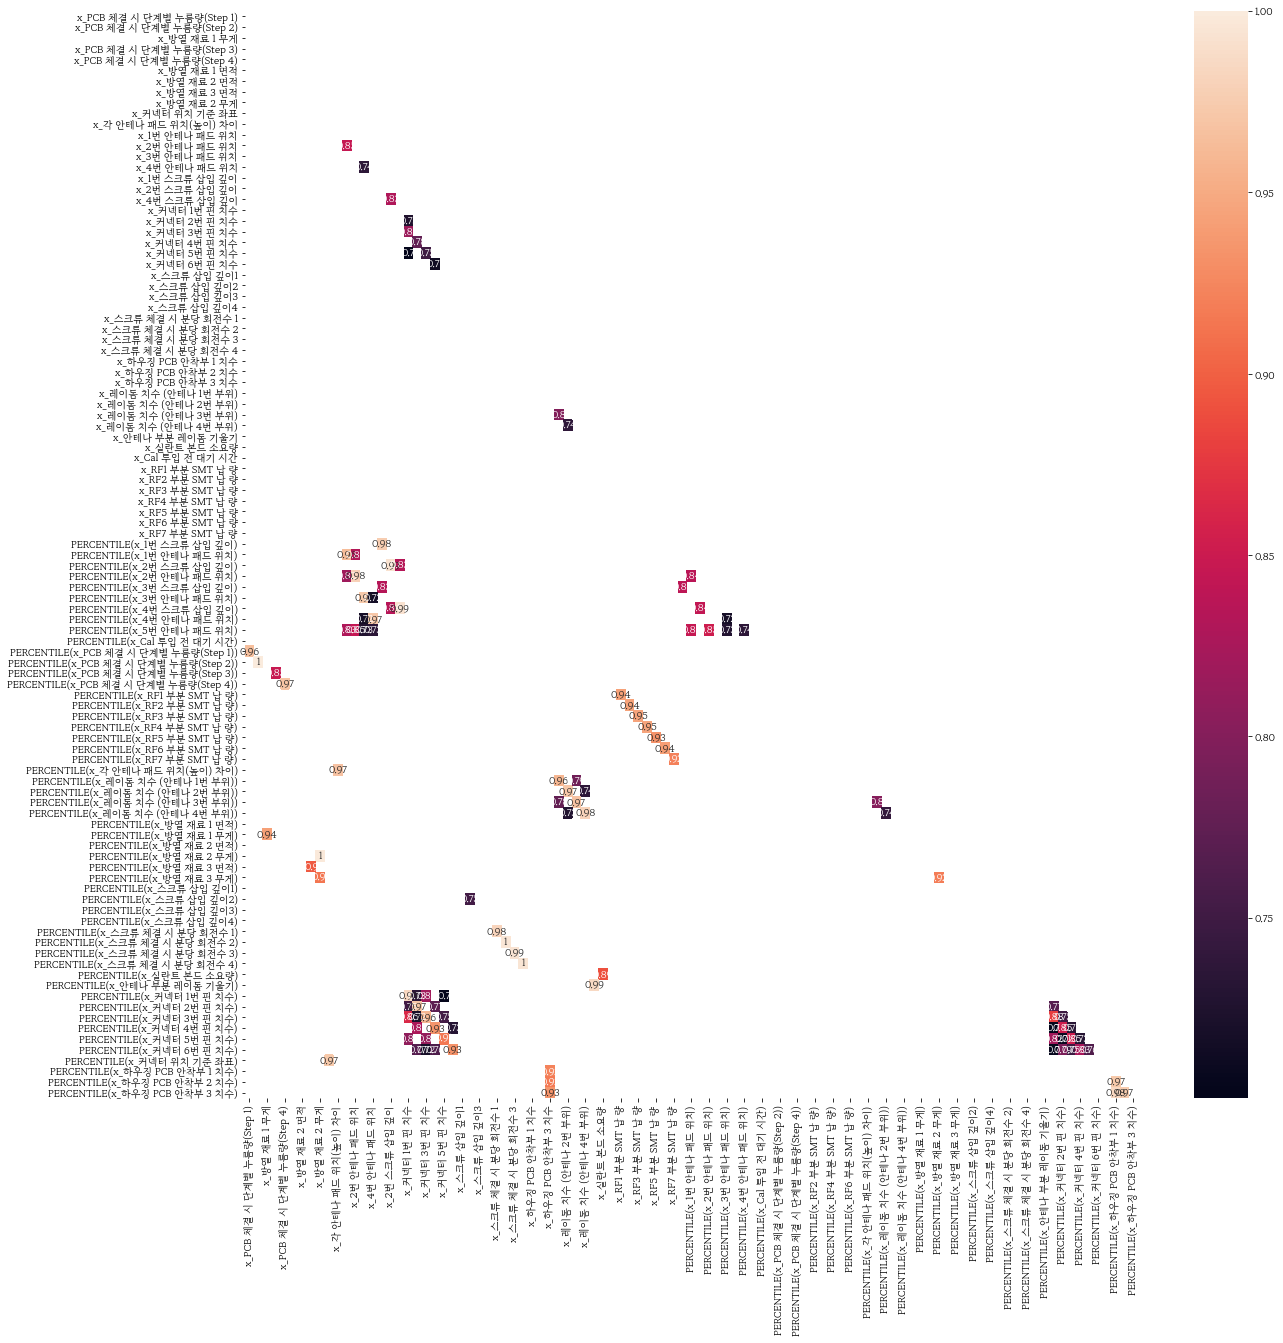

In [26]:
%matplotlib inline

mask = np.zeros_like(train_x.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(train_x.corr()[train_x.corr() >= np.abs(0.7)], annot=True, mask=mask)
plt.show()

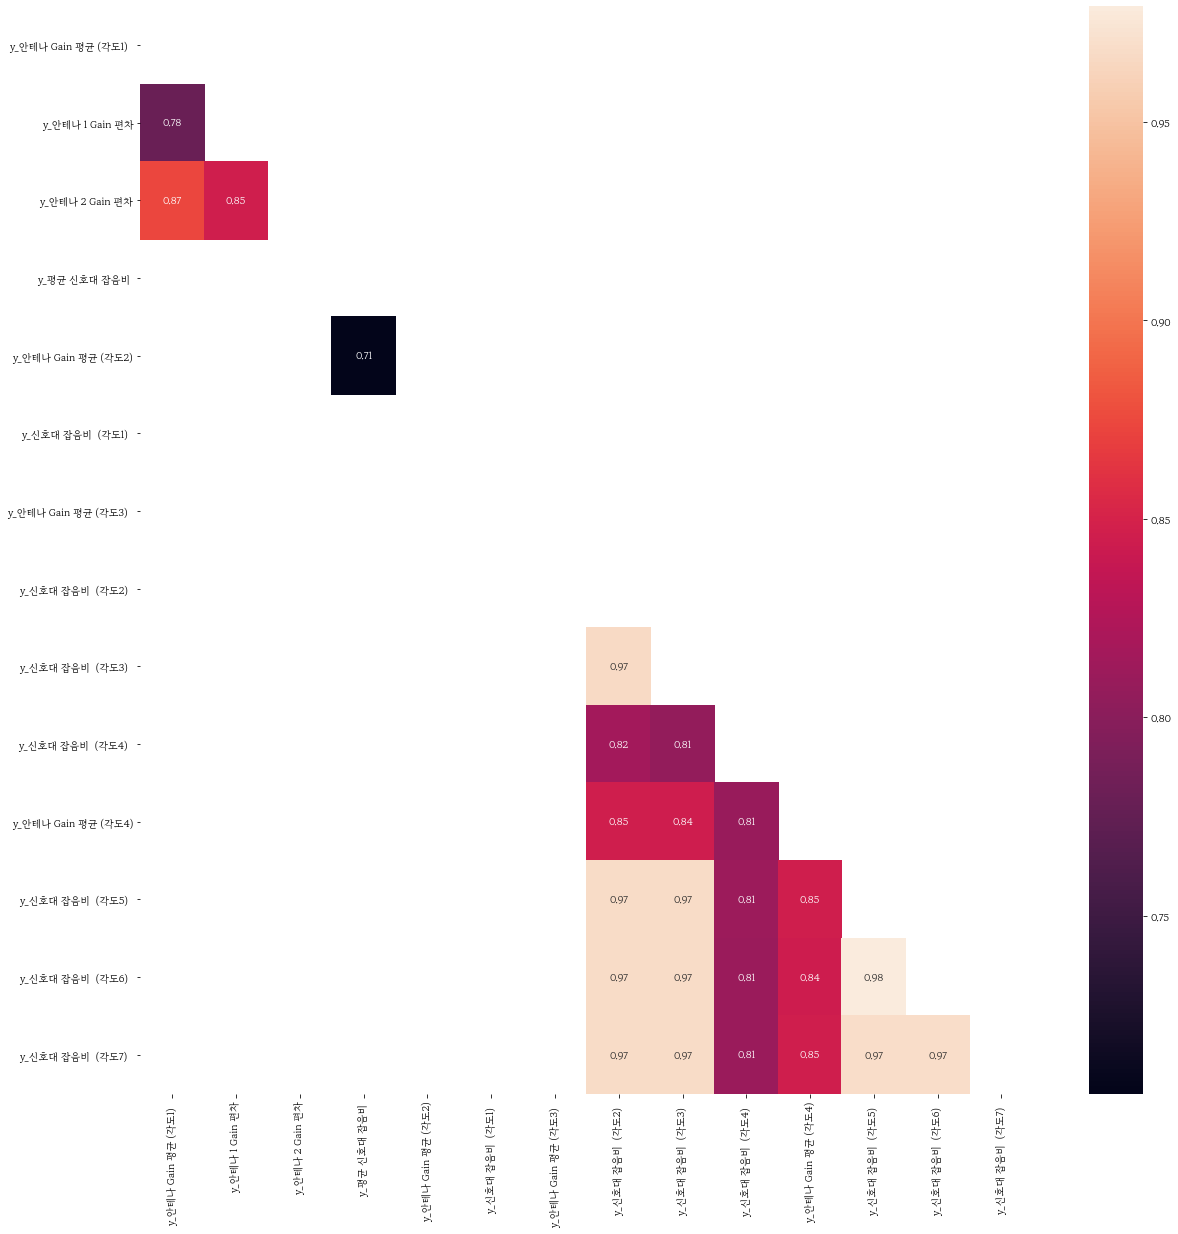

In [27]:
%matplotlib inline

mask = np.zeros_like(train_y.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(train_y.corr()[train_y.corr() >= np.abs(0.7)], annot=True, mask=mask)
plt.show()

In [28]:
fm_df = pd.concat([train_x, train_y], axis=1)
fm_df.head(3)

,x_PCB 체결 시 단계별 누름량(Step 1),x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,PERCENTILE(x_1번 스크류 삽입 깊이),PERCENTILE(x_1번 안테나 패드 위치),PERCENTILE(x_2번 스크류 삽입 깊이),PERCENTILE(x_2번 안테나 패드 위치),PERCENTILE(x_3번 스크류 삽입 깊이),PERCENTILE(x_3번 안테나 패드 위치),PERCENTILE(x_4번 스크류 삽입 깊이),PERCENTILE(x_4번 안테나 패드 위치),PERCENTILE(x_5번 안테나 패드 위치),PERCENTILE(x_Cal 투입 전 대기 시간),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 1)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 2)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 3)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 4)),PERCENTILE(x_RF1 부분 SMT 납 량),PERCENTILE(x_RF2 부분 SMT 납 량),PERCENTILE(x_RF3 부분 SMT 납 량),PERCENTILE(x_RF4 부분 SMT 납 량),PERCENTILE(x_RF5 부분 SMT 납 량),PERCENTILE(x_RF6 부분 SMT 납 량),PERCENTILE(x_RF7 부분 SMT 납 량),PERCENTILE(x_각 안테나 패드 위치(높이) 차이),PERCENTILE(x_레이돔 치수 (안테나 1번 부위)),PERCENTILE(x_레이돔 치수 (안테나 2번 부위)),PERCENTILE(x_레이돔 치수 (안테나 3번 부위)),PERCENTILE(x_레이돔 치수 (안테나 4번 부위)),PERCENTILE(x_방열 재료 1 면적),PERCENTILE(x_방열 재료 1 무게),PERCENTILE(x_방열 재료 2 면적),PERCENTILE(x_방열 재료 2 무게),PERCENTILE(x_방열 재료 3 면적),PERCENTILE(x_방열 재료 3 무게),PERCENTILE(x_스크류 삽입 깊이1),PERCENTILE(x_스크류 삽입 깊이2),PERCENTILE(x_스크류 삽입 깊이3),PERCENTILE(x_스크류 삽입 깊이4),PERCENTILE(x_스크류 체결 시 분당 회전수 1),PERCENTILE(x_스크류 체결 시 분당 회전수 2),PERCENTILE(x_스크류 체결 시 분당 회전수 3),PERCENTILE(x_스크류 체결 시 분당 회전수 4),PERCENTILE(x_실란트 본드 소요량),PERCENTILE(x_안테나 부분 레이돔 기울기),PERCENTILE(x_커넥터 1번 핀 치수),PERCENTILE(x_커넥터 2번 핀 치수),PERCENTILE(x_커넥터 3번 핀 치수),PERCENTILE(x_커넥터 4번 핀 치수),PERCENTILE(x_커넥터 5번 핀 치수),PERCENTILE(x_커넥터 6번 핀 치수),PERCENTILE(x_커넥터 위치 기준 좌표),PERCENTILE(x_하우징 PCB 안착부 1 치수),PERCENTILE(x_하우징 PCB 안착부 2 치수),PERCENTILE(x_하우징 PCB 안착부 3 치수),y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도3),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4),y_신호대 잡음비 (각도5),y_신호대 잡음비 (각도6),y_신호대 잡음비 (각도7)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,70.543999,103.320000,67.470001,101.891998,74.983002,29.450001,62.380001,245.710007,0.0,4.34,0.18,13.34,13.37,13.40,13.52,3.11,3.17,3.13,2.05,2.07,2.05,2.06,2.06,2.35,1.49,1.69,1.46,1.74,12.99,12.88,12.89,12.99,-16.410000,-16.360001,-17.030001,21.200001,20.990000,21.280001,21.090000,0.29,1463,9706.030273,137.043594,135.359222,147.837967,134.313477,125.605431,136.721420,125.028259,0.093885,0.133789,0.469942,0.342692,0.123640,0.046204,0.205052,0.615207,0.353183,0.033605,0.804340,0.416858,0.056884,0.965347,0.864721,0.760472,0.929381,0.874946,0.310905,0.426187,0.243555,0.918815,0.671750,0.038061,0.948456,0.039513,0.667332,0.518923,0.014959,0.499609,0.579191,0.499672,0.985962,0.941134,0.976658,0.931414,0.805274,0.304277,0.210039,0.902732,0.047694,0.997879,0.007145,0.258679,0.160148,0.126695,0.063865,0.996289,0.066933,0.019757,0.037683,0.030891,2.056,1.456,1.680,10.502,29.632000,16.083,4.276,-25.381001,-25.528999,-22.768999,23.792,-25.469999,-25.409,-25.304001
1,69.524002,103.320999,65.169998,101.944000,72.943001,28.730000,61.230000,233.610001,0.0,4.38,0.18,13.33,13.33,13.46,13.51,2.97,3.11,3.20,2.10,2.10,2.10,2.10,2.17,2.28,1.49,1.67,1.45,1.66,12.92,12.87,12.89,12.93,-16.059999,-16.110001,-16.740000,21.160000,21.030001,21.160000,21.129999,0.13,1463,10423.429688,133.736694,135.979813,149

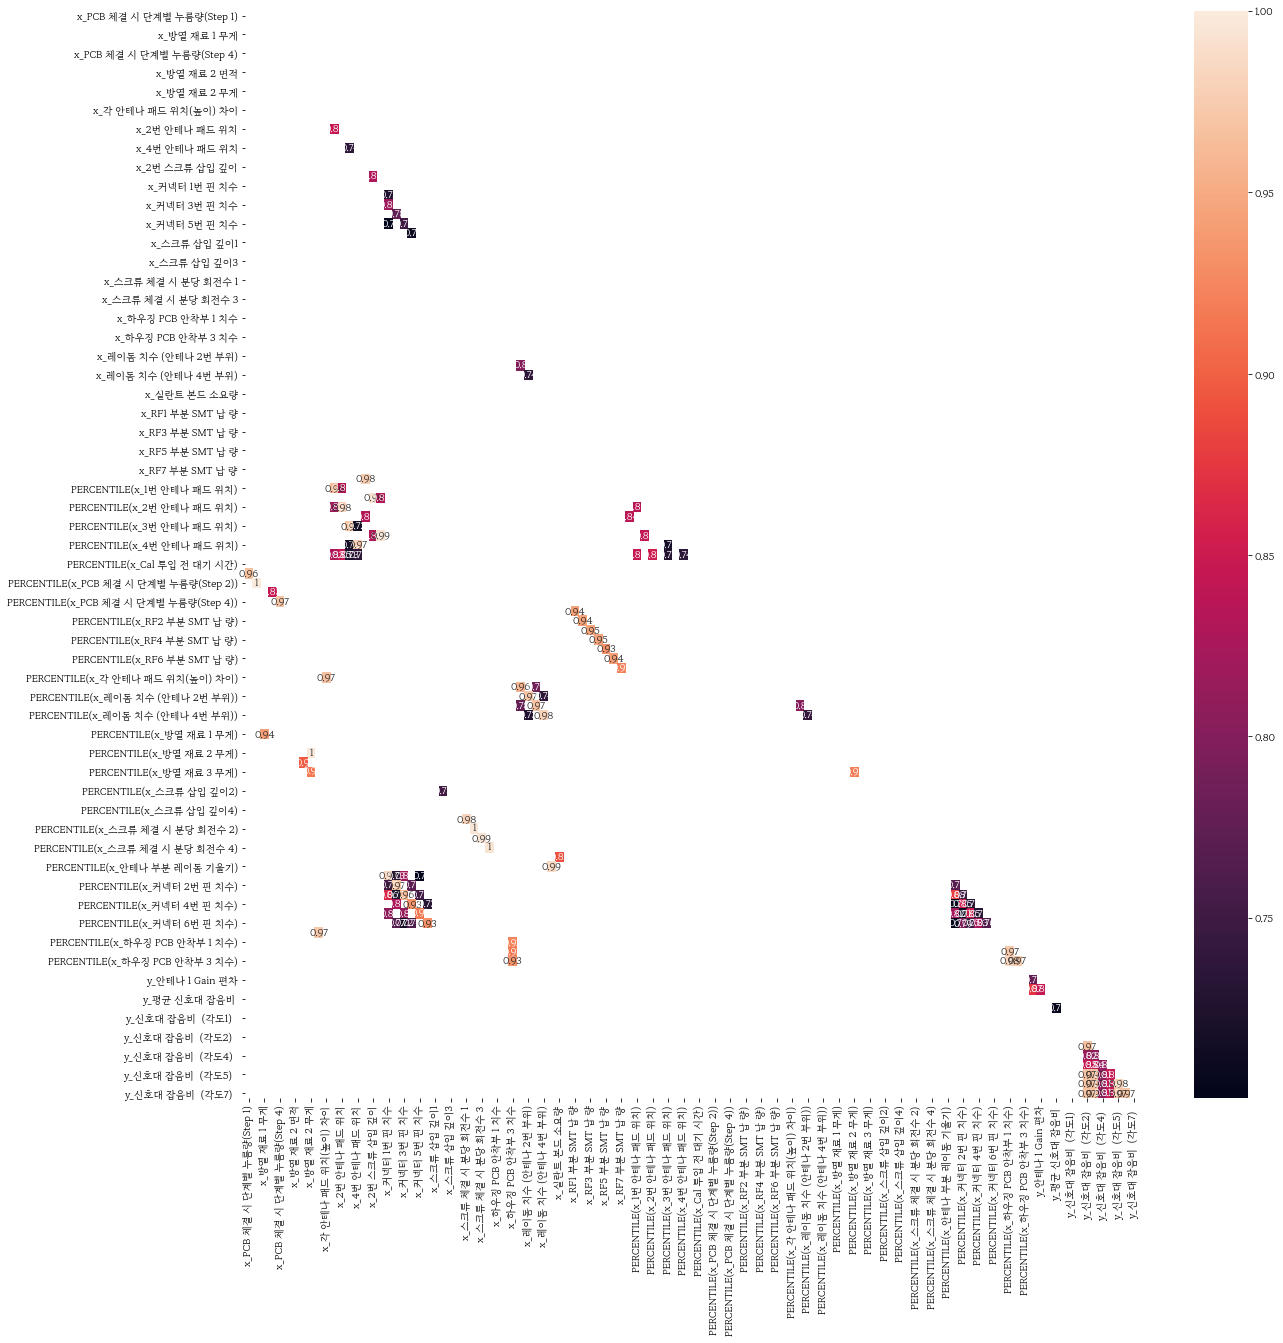

In [29]:
mask = np.zeros_like(fm_df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(fm_df.corr()[fm_df.corr() >= np.abs(0.7)], annot=True, mask=mask)
plt.show()

In [30]:
fm_df[fm_df.filter(regex='PERCENTILE').columns] = fm_df.filter(regex='PERCENTILE').apply(lambda x: x*100)
new_fm1[new_fm1.filter(regex='PERCENTILE').columns] = new_fm1.filter(regex='PERCENTILE').apply(lambda x: x*100)

## Check outliers

In [31]:
fm_df.describe()

,x_PCB 체결 시 단계별 누름량(Step 1),x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,PERCENTILE(x_1번 스크류 삽입 깊이),PERCENTILE(x_1번 안테나 패드 위치),PERCENTILE(x_2번 스크류 삽입 깊이),PERCENTILE(x_2번 안테나 패드 위치),PERCENTILE(x_3번 스크류 삽입 깊이),PERCENTILE(x_3번 안테나 패드 위치),PERCENTILE(x_4번 스크류 삽입 깊이),PERCENTILE(x_4번 안테나 패드 위치),PERCENTILE(x_5번 안테나 패드 위치),PERCENTILE(x_Cal 투입 전 대기 시간),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 1)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 2)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 3)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 4)),PERCENTILE(x_RF1 부분 SMT 납 량),PERCENTILE(x_RF2 부분 SMT 납 량),PERCENTILE(x_RF3 부분 SMT 납 량),PERCENTILE(x_RF4 부분 SMT 납 량),PERCENTILE(x_RF5 부분 SMT 납 량),PERCENTILE(x_RF6 부분 SMT 납 량),PERCENTILE(x_RF7 부분 SMT 납 량),PERCENTILE(x_각 안테나 패드 위치(높이) 차이),PERCENTILE(x_레이돔 치수 (안테나 1번 부위)),PERCENTILE(x_레이돔 치수 (안테나 2번 부위)),PERCENTILE(x_레이돔 치수 (안테나 3번 부위)),PERCENTILE(x_레이돔 치수 (안테나 4번 부위)),PERCENTILE(x_방열 재료 1 면적),PERCENTILE(x_방열 재료 1 무게),PERCENTILE(x_방열 재료 2 면적),PERCENTILE(x_방열 재료 2 무게),PERCENTILE(x_방열 재료 3 면적),PERCENTILE(x_방열 재료 3 무게),PERCENTILE(x_스크류 삽입 깊이1),PERCENTILE(x_스크류 삽입 깊이2),PERCENTILE(x_스크류 삽입 깊이3),PERCENTILE(x_스크류 삽입 깊이4),PERCENTILE(x_스크류 체결 시 분당 회전수 1),PERCENTILE(x_스크류 체결 시 분당 회전수 2),PERCENTILE(x_스크류 체결 시 분당 회전수 3),PERCENTILE(x_스크류 체결 시 분당 회전수 4),PERCENTILE(x_실란트 본드 소요량),PERCENTILE(x_안테나 부분 레이돔 기울기),PERCENTILE(x_커넥터 1번 핀 치수),PERCENTILE(x_커넥터 2번 핀 치수),PERCENTILE(x_커넥터 3번 핀 치수),PERCENTILE(x_커넥터 4번 핀 치수),PERCENTILE(x_커넥터 5번 핀 치수),PERCENTILE(x_커넥터 6번 핀 치수),PERCENTILE(x_커넥터 위치 기준 좌표),PERCENTILE(x_하우징 PCB 안착부 1 치수),PERCENTILE(x_하우징 PCB 안착부 2 치수),PERCENTILE(x_하우징 PCB 안착부 3 치수),y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도3),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4),y_신호대 잡음비 (각도5),y_신호대 잡음비 (각도6),y_신호대 잡음비 (각도7)
count,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.00000

In [32]:
def check_outlier(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q1, q3 = np.quantile(data.iloc[:, column], 0.25), np.quantile(data.iloc[:, column], 0.75)          
    
    # IQR 계산하기     
    iqr = q3 - q1    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q1 - cut_off, q3 + cut_off      

    return lower, upper

In [35]:
# 카테고리컬 데이터로 구분하여 확인하기
cols = fm_df.columns; cnt_vc = {c: len(fm_df[c].value_counts()) for c in cols if len(fm_df[c].value_counts()) <= 10}
idx_nm = pd.DataFrame.from_dict(cnt_vc, columns = ['values'], orient='index').index
for nm in idx_nm:
    print(fm_df[nm].value_counts())

# x_PCB 체결 시 단계별 누름량(Step 2), x_방열 재료 2 무게, x_방열 재료 3 무게 => 불균형이 보여짐 (어떻게 할 것인가)

103.320000    33020
103.320999     6587
Name: x_PCB 체결 시 단계별 누름량(Step 2), dtype: int64
0.0    39575
2.9       12
3.0       12
3.3        4
3.1        2
3.6        1
3.2        1
Name: x_방열 재료 2 무게, dtype: int64
41.685813    33020
91.685813     6587
Name: PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 2)), dtype: int64
49.960866     39575
99.935617        12
99.965915        12
99.993688         4
99.983589         2
100.000000        1
99.987376         1
Name: PERCENTILE(x_방열 재료 2 무게), dtype: int64
49.967178     39580
99.955816        12
99.984851        11
99.936880         3
100.000000        1
Name: PERCENTILE(x_방열 재료 3 무게), dtype: int64


In [36]:
fm_df.drop(columns=idx_nm, axis=1, inplace=True)
fm_df.head(3)

,x_PCB 체결 시 단계별 누름량(Step 1),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,PERCENTILE(x_1번 스크류 삽입 깊이),PERCENTILE(x_1번 안테나 패드 위치),PERCENTILE(x_2번 스크류 삽입 깊이),PERCENTILE(x_2번 안테나 패드 위치),PERCENTILE(x_3번 스크류 삽입 깊이),PERCENTILE(x_3번 안테나 패드 위치),PERCENTILE(x_4번 스크류 삽입 깊이),PERCENTILE(x_4번 안테나 패드 위치),PERCENTILE(x_5번 안테나 패드 위치),PERCENTILE(x_Cal 투입 전 대기 시간),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 1)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 3)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 4)),PERCENTILE(x_RF1 부분 SMT 납 량),PERCENTILE(x_RF2 부분 SMT 납 량),PERCENTILE(x_RF3 부분 SMT 납 량),PERCENTILE(x_RF4 부분 SMT 납 량),PERCENTILE(x_RF5 부분 SMT 납 량),PERCENTILE(x_RF6 부분 SMT 납 량),PERCENTILE(x_RF7 부분 SMT 납 량),PERCENTILE(x_각 안테나 패드 위치(높이) 차이),PERCENTILE(x_레이돔 치수 (안테나 1번 부위)),PERCENTILE(x_레이돔 치수 (안테나 2번 부위)),PERCENTILE(x_레이돔 치수 (안테나 3번 부위)),PERCENTILE(x_레이돔 치수 (안테나 4번 부위)),PERCENTILE(x_방열 재료 1 면적),PERCENTILE(x_방열 재료 1 무게),PERCENTILE(x_방열 재료 2 면적),PERCENTILE(x_방열 재료 3 면적),PERCENTILE(x_스크류 삽입 깊이1),PERCENTILE(x_스크류 삽입 깊이2),PERCENTILE(x_스크류 삽입 깊이3),PERCENTILE(x_스크류 삽입 깊이4),PERCENTILE(x_스크류 체결 시 분당 회전수 1),PERCENTILE(x_스크류 체결 시 분당 회전수 2),PERCENTILE(x_스크류 체결 시 분당 회전수 3),PERCENTILE(x_스크류 체결 시 분당 회전수 4),PERCENTILE(x_실란트 본드 소요량),PERCENTILE(x_안테나 부분 레이돔 기울기),PERCENTILE(x_커넥터 1번 핀 치수),PERCENTILE(x_커넥터 2번 핀 치수),PERCENTILE(x_커넥터 3번 핀 치수),PERCENTILE(x_커넥터 4번 핀 치수),PERCENTILE(x_커넥터 5번 핀 치수),PERCENTILE(x_커넥터 6번 핀 치수),PERCENTILE(x_커넥터 위치 기준 좌표),PERCENTILE(x_하우징 PCB 안착부 1 치수),PERCENTILE(x_하우징 PCB 안착부 2 치수),PERCENTILE(x_하우징 PCB 안착부 3 치수),y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도3),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4),y_신호대 잡음비 (각도5),y_신호대 잡음비 (각도6),y_신호대 잡음비 (각도7)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,70.543999,67.470001,101.891998,74.983002,29.450001,62.380001,245.710007,4.34,0.18,13.34,13.37,13.40,13.52,3.11,3.17,3.13,2.05,2.07,2.05,2.06,2.06,2.35,1.49,1.69,1.46,1.74,12.99,12.88,12.89,12.99,-16.410000,-16.360001,-17.030001,21.200001,20.990000,21.280001,21.090000,0.29,1463,9706.030273,137.043594,135.359222,147.837967,134.313477,125.605431,136.721420,125.028259,9.388492,13.378948,46.994218,34.269195,12.363976,4.620395,20.505214,61.520691,35.318252,3.360517,80.434014,5.688388,96.534703,86.472088,76.047163,92.938117,87.494635,31.090464,42.618729,24.355543,91.881486,67.174994,3.806145,94.845608,3.951322,66.733153,51.892342,1.495948,57.919055,98.596208,94.113414,97.665817,93.141364,80.527432,30.427702,21.003863,90.273184,4.769359,99.787916,0.714520,25.867902,16.014846,12.669478,6.386497,99.628853,6.693261,1.975661,3.768273,3.089100,2.056,1.456,1.680,10.502,29.632000,16.083,4.276,-25.381001,-25.528999,-22.768999,23.792,-25.469999,-25.409,-25.304001
1,69.524002,65.169998,101.944000,72.943001,28.730000,61.230000,233.610001,4.38,0.18,13.33,13.33,13.46,13.51,2.97,3.11,3.20,2.10,2.10,2.10,2.10,2.17,2.28,1.49,1.67,1.45,1.66,12.92,12.87,12.89,12.93,-16.059999,-16.110001,-16.740000,21.160000,21.030001,21.160000,21.129999,0.13,1463,10423.429688,133.736694,135.979813,149.924698,123.630585,127.893333,143.322662,124.877312,0.116141,7.736006,28.719671,4.550963,0.114879,43.099705,41.250284,42.689424,15.079405,7.362335,69.470043

In [37]:
cols = new_fm1.columns; cnt_vc_test = {c: len(new_fm1[c].value_counts()) for c in cols if len(new_fm1[c].value_counts()) <= 10}
idx_nm_test = pd.DataFrame.from_dict(cnt_vc_test, columns = ['values'], orient='index').index
new_fm1.drop(columns=idx_nm_test, axis=1, inplace=True)
new_fm1.head(3)

,x_PCB 체결 시 단계별 누름량(Step 1),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,PERCENTILE(x_1번 스크류 삽입 깊이),PERCENTILE(x_1번 안테나 패드 위치),PERCENTILE(x_2번 스크류 삽입 깊이),PERCENTILE(x_2번 안테나 패드 위치),PERCENTILE(x_3번 스크류 삽입 깊이),PERCENTILE(x_3번 안테나 패드 위치),PERCENTILE(x_4번 스크류 삽입 깊이),PERCENTILE(x_4번 안테나 패드 위치),PERCENTILE(x_5번 안테나 패드 위치),PERCENTILE(x_Cal 투입 전 대기 시간),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 1)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 3)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 4)),PERCENTILE(x_RF1 부분 SMT 납 량),PERCENTILE(x_RF2 부분 SMT 납 량),PERCENTILE(x_RF3 부분 SMT 납 량),PERCENTILE(x_RF4 부분 SMT 납 량),PERCENTILE(x_RF5 부분 SMT 납 량),PERCENTILE(x_RF6 부분 SMT 납 량),PERCENTILE(x_RF7 부분 SMT 납 량),PERCENTILE(x_각 안테나 패드 위치(높이) 차이),PERCENTILE(x_레이돔 치수 (안테나 1번 부위)),PERCENTILE(x_레이돔 치수 (안테나 2번 부위)),PERCENTILE(x_레이돔 치수 (안테나 3번 부위)),PERCENTILE(x_레이돔 치수 (안테나 4번 부위)),PERCENTILE(x_방열 재료 1 면적),PERCENTILE(x_방열 재료 1 무게),PERCENTILE(x_방열 재료 2 면적),PERCENTILE(x_방열 재료 3 면적),PERCENTILE(x_스크류 삽입 깊이1),PERCENTILE(x_스크류 삽입 깊이2),PERCENTILE(x_스크류 삽입 깊이3),PERCENTILE(x_스크류 삽입 깊이4),PERCENTILE(x_스크류 체결 시 분당 회전수 1),PERCENTILE(x_스크류 체결 시 분당 회전수 2),PERCENTILE(x_스크류 체결 시 분당 회전수 3),PERCENTILE(x_스크류 체결 시 분당 회전수 4),PERCENTILE(x_실란트 본드 소요량),PERCENTILE(x_안테나 부분 레이돔 기울기),PERCENTILE(x_커넥터 1번 핀 치수),PERCENTILE(x_커넥터 2번 핀 치수),PERCENTILE(x_커넥터 3번 핀 치수),PERCENTILE(x_커넥터 4번 핀 치수),PERCENTILE(x_커넥터 5번 핀 치수),PERCENTILE(x_커넥터 6번 핀 치수),PERCENTILE(x_커넥터 위치 기준 좌표),PERCENTILE(x_하우징 PCB 안착부 1 치수),PERCENTILE(x_하우징 PCB 안착부 2 치수),PERCENTILE(x_하우징 PCB 안착부 3 치수)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,68.503998,76.669998,101.866997,73.962997,30.510000,63.570000,239.800003,4.37,0.15,13.38,13.40,13.50,13.53,3.27,3.32,3.39,2.22,2.14,2.31,2.16,2.32,2.22,1.38,1.53,1.33,1.53,12.96,12.95,12.97,12.88,-16.17,-16.17,-16.840000,21.219999,21.059999,21.209999,21.200001,0.16,1469,17227.630859,138.130432,129.460678,141.506577,133.427231,129.711502,133.138092,121.859688,65.320137,61.731216,89.074177,68.115027,58.301353,83.746970,93.029186,78.169814,65.004545,72.318723,53.765653,1.867047,91.832458,89.880832,36.121491,68.084730,83.945163,62.219754,22.086447,8.442739,63.342002,85.962432,51.352000,55.525399,79.269340,83.358160,89.532418,1.678954,53.267017,64.292567,25.412795,0.598364,6.462078,49.973490,63.940366,65.614270,31.121238,56.844577,55.881388,99.825793,91.627954,99.901535,94.766209,99.599828,87.826954,42.045799,23.622753,23.107706,21.556251
1,67.485001,69.370003,101.991997,67.845001,28.030001,116.989998,189.229996,4.36,0.17,13.35,13.38,13.45,13.52,3.26,3.30,3.34,2.11,2.10,2.10,2.10,2.17,2.20,1.36,1.56,1.34,1.55,12.94,12.89,13.00,12.88,-15.35,-15.25,-16.010000,21.209999,20.990000,21.260000,21.150000,0.27,1462,17134.529297,136.148834,128.266281,145.911743,131.196411,132.411484,133.629028,124.178619,62.484852,21.702686,84.462735,46.061402,55.053272,32.907493,81.088416,61.093718,35.101495,71.578974,38.456877,43.204656,10.181024,82.985760,28.234195,88.063018,71.879418,80.636488,24.646536,18.713391,85.550899,77.503282,3.663401,88.286457,43.558120,27.794890,64.614472,57.186679,25.618562,13.571753,62.085942,4.613967,26.344425,36.533024,36.752676,90.009594,31.121238,3.293527,99.224904,44.188043,58.548778,59.707635,55.650374,92.372753,76.947839,27.200313,92.578519,94.761159,9

In [33]:
rc = np.random.randint(1, len(fm_df.columns), size=4)
rc

array([56,  3, 60, 44])

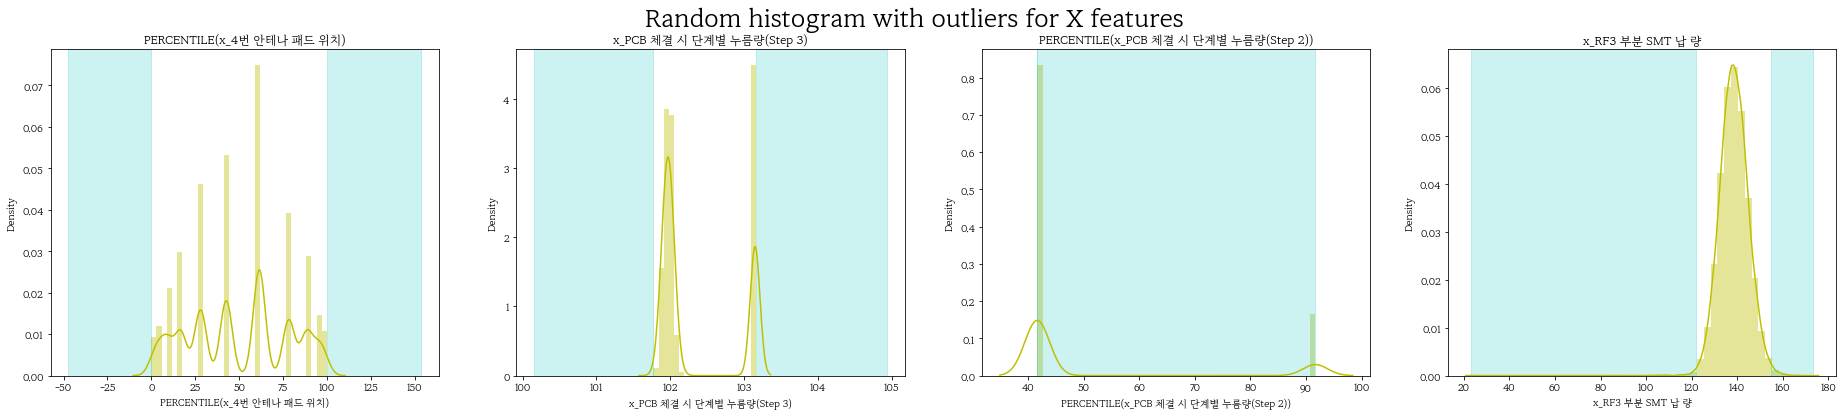

In [34]:
# 이상치 영역을 나타내는 그래프 그리기 - 랜덤하게 일부 컬럼만 지정하고 확인하기
fig, (ax1, ax2, ax3, ax4)= plt.subplots(1, 4, figsize=(32, 6))

fig.suptitle('Random histogram with outliers for X features', fontsize=25)

rc1 = rc[0]
lower, upper = check_outlier(fm_df, rc1)

# 컬럼별 데이터 분포 확인하기
sns.distplot(fm_df.iloc[:, rc1], color = 'y', ax = ax1)

# 이상치 영역 박스 그리기
ax1.axvspan(lower, fm_df.iloc[:, rc1].min(), alpha=0.2, color='c')
ax1.axvspan(upper, fm_df.iloc[:, rc1].max(), alpha=0.2, color='c')
ax1.set_title(fm_df.columns[rc1])


rc2= rc[1]
lower, upper = check_outlier(fm_df, rc2)

sns.distplot(fm_df.iloc[:, rc2], color = 'y', ax = ax2)

ax2.axvspan(lower, fm_df.iloc[:, rc2].min(), alpha=0.2, color='c')
ax2.axvspan(upper, fm_df.iloc[:, rc2].max(), alpha=0.2, color='c')
ax2.set_title(fm_df.columns[rc2])


rc3 = rc[2]
lower, upper = check_outlier(fm_df, rc3)

sns.distplot(fm_df.iloc[:, rc3], color = 'y', ax = ax3)

ax3.axvspan(lower, fm_df.iloc[:, rc3].min(), alpha=0.2, color='c')
ax3.axvspan(upper, fm_df.iloc[:, rc3].max(), alpha=0.2, color='c')
ax3.set_title(fm_df.columns[rc3])


rc4 = rc[3]
lower, upper = check_outlier(fm_df, rc4)

sns.distplot(fm_df.iloc[:, rc4], color = 'y', ax = ax4)

ax4.axvspan(lower, fm_df.iloc[:, rc4].min(), alpha=0.2, color='c')
ax4.axvspan(upper, fm_df.iloc[:, rc4].max(), alpha=0.2, color='c')
ax4.set_title(fm_df.columns[rc4])

plt.show()

    
# 특정 컬럼들에서 이상치가 넓은 면적으로 보이는 경우 삭제 후 모델링 진행이 필요해보임. 

In [38]:
# 최소, 최댓값 (상, 하한선 초과, 미만 값 확인)
for col in range(len(fm_df.columns)):
    lower, upper = check_outlier(fm_df, col)
#     # print(lower, upper)
    print(fm_df.columns[col], fm_df[fm_df.iloc[:, col].apply(lambda x: x<lower or x>upper)].index)
#     fm_df[fm_df.iloc[:, col].apply(lambda x: x<lower or x>upper)] = np.nan
# fm_df.head(3)

x_PCB 체결 시 단계별 누름량(Step 1) Int64Index([   10,    26,    37,    39,    41,    49,    93,   114,   123,
              138,
            ...
            37932, 38047, 38215, 38316, 38404, 38450, 38497, 38756, 38901,
            39343],
           dtype='int64', name='ID', length=1145)
x_방열 재료 1 무게 Int64Index([ 2181,  2184,  4490,  6896,  6901,  6902,  6912,  9178,  9184,
            11532,
            ...
            36096, 36097, 36103, 36106, 36134, 36136, 36139, 36142, 36144,
            36148],
           dtype='int64', name='ID', length=699)
x_PCB 체결 시 단계별 누름량(Step 3) Int64Index([], dtype='int64', name='ID')
x_PCB 체결 시 단계별 누름량(Step 4) Int64Index([    3,     9,    10,    13,    18,    26,    29,    94,   101,
              114,
            ...
            36476, 36562, 36732, 36792, 36859, 37074, 37828, 37911, 38040,
            38143],
           dtype='int64', name='ID', length=419)
x_방열 재료 1 면적 Int64Index([   74,   244,   249,   287,   297,   305,   312,   314,   316,
              

In [39]:
# # 결측값이 잘 만들어졌는지 확인

# fm_df.isnull().sum()

In [40]:
# print(fm_df[fm_df.iloc[:, 8].isnull()].index[:10])

In [41]:
# 윈저라이징 기법으로 이상치 부분 처리 가능 (삭제 대신으로 사용할 수 있음)
# replace the outliers with other values. 
# Common is replacing the outliers on the upper side with 95% percentile value and outlier on the lower side with 5% percentile. 
# Z-score에서 표준편차가 3인 경우 일반적으로 많이 사용

from scipy.stats import mstats
for c in range(len(fm_df.columns)):
    print(fm_df.columns[c], mstats.winsorize(fm_df.iloc[:, c].values, axis=1))       

x_PCB 체결 시 단계별 누름량(Step 1) [70.54399872 69.52400208 72.58300018 ... 68.5039978  66.46499634
 66.46499634]
x_방열 재료 1 무게 [67.47000122 65.16999817 64.06999969 ... 64.66999817 63.66999817
 65.66999817]
x_PCB 체결 시 단계별 누름량(Step 3) [101.89199829 101.94400024 103.15299988 ... 103.14399719 102.02500153
 102.0039978 ]
x_PCB 체결 시 단계별 누름량(Step 4) [74.98300171 72.94300079 72.94300079 ... 68.86399841 67.84500122
 69.88400269]
x_방열 재료 1 면적 [29.45000076 28.72999954 28.80999947 ... 29.95999908 30.29999924
 30.15999985]
x_방열 재료 2 면적 [ 62.38000107  61.22999954 105.76999664 ... 102.61000061 112.59999847
 112.90000153]
x_방열 재료 3 면적 [245.71000671 233.61000061 272.20001221 ... 198.07000732 275.51998901
 276.05999756]
x_커넥터 위치 기준 좌표 [4.34000015 4.38000011 4.36000013 ... 4.38000011 4.32999992 4.38000011]
x_각 안테나 패드 위치(높이) 차이 [0.18000001 0.18000001 0.15000001 ... 0.14       0.16       0.14      ]
x_1번 안테나 패드 위치 [13.34000015 13.32999992 13.35999966 ... 13.38000011 13.35999966
 13.39000034]
x_2번 안테나 패드 위치 [13.369

In [42]:
def winsorize_outliers(data):
    return mstats.winsorize(data, limits=[0.05, 0.05], axis=0, nan_policy = 'propagate')

In [43]:
print(fm_df.iloc[10])

x_PCB 체결 시 단계별 누름량(Step 1)     74.623001
x_방열 재료 1 무게                   68.570000
x_PCB 체결 시 단계별 누름량(Step 3)    101.935997
x_PCB 체결 시 단계별 누름량(Step 4)     77.022003
x_방열 재료 1 면적                   29.059999
                                 ...    
y_신호대 잡음비  (각도4)              -22.495001
y_안테나 Gain 평균 (각도4)            24.663000
y_신호대 잡음비  (각도5)              -25.725000
y_신호대 잡음비  (각도6)              -25.681000
y_신호대 잡음비  (각도7)              -25.768000
Name: 10, Length: 110, dtype: float64


In [44]:
# 최소, 최댓값 (상, 하한선 초과, 미만 값 => 윈저화값 변환)
for col in range(len(fm_df.columns)):
    lower, upper = check_outlier(fm_df, col)
    fm_df[fm_df.iloc[:, col].apply(lambda x: x<lower or x>upper)] = fm_df[fm_df.iloc[:, col].apply(lambda x: x<lower or x>upper)].apply(winsorize_outliers)
fm_df.head(3)

,x_PCB 체결 시 단계별 누름량(Step 1),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,PERCENTILE(x_1번 스크류 삽입 깊이),PERCENTILE(x_1번 안테나 패드 위치),PERCENTILE(x_2번 스크류 삽입 깊이),PERCENTILE(x_2번 안테나 패드 위치),PERCENTILE(x_3번 스크류 삽입 깊이),PERCENTILE(x_3번 안테나 패드 위치),PERCENTILE(x_4번 스크류 삽입 깊이),PERCENTILE(x_4번 안테나 패드 위치),PERCENTILE(x_5번 안테나 패드 위치),PERCENTILE(x_Cal 투입 전 대기 시간),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 1)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 3)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 4)),PERCENTILE(x_RF1 부분 SMT 납 량),PERCENTILE(x_RF2 부분 SMT 납 량),PERCENTILE(x_RF3 부분 SMT 납 량),PERCENTILE(x_RF4 부분 SMT 납 량),PERCENTILE(x_RF5 부분 SMT 납 량),PERCENTILE(x_RF6 부분 SMT 납 량),PERCENTILE(x_RF7 부분 SMT 납 량),PERCENTILE(x_각 안테나 패드 위치(높이) 차이),PERCENTILE(x_레이돔 치수 (안테나 1번 부위)),PERCENTILE(x_레이돔 치수 (안테나 2번 부위)),PERCENTILE(x_레이돔 치수 (안테나 3번 부위)),PERCENTILE(x_레이돔 치수 (안테나 4번 부위)),PERCENTILE(x_방열 재료 1 면적),PERCENTILE(x_방열 재료 1 무게),PERCENTILE(x_방열 재료 2 면적),PERCENTILE(x_방열 재료 3 면적),PERCENTILE(x_스크류 삽입 깊이1),PERCENTILE(x_스크류 삽입 깊이2),PERCENTILE(x_스크류 삽입 깊이3),PERCENTILE(x_스크류 삽입 깊이4),PERCENTILE(x_스크류 체결 시 분당 회전수 1),PERCENTILE(x_스크류 체결 시 분당 회전수 2),PERCENTILE(x_스크류 체결 시 분당 회전수 3),PERCENTILE(x_스크류 체결 시 분당 회전수 4),PERCENTILE(x_실란트 본드 소요량),PERCENTILE(x_안테나 부분 레이돔 기울기),PERCENTILE(x_커넥터 1번 핀 치수),PERCENTILE(x_커넥터 2번 핀 치수),PERCENTILE(x_커넥터 3번 핀 치수),PERCENTILE(x_커넥터 4번 핀 치수),PERCENTILE(x_커넥터 5번 핀 치수),PERCENTILE(x_커넥터 6번 핀 치수),PERCENTILE(x_커넥터 위치 기준 좌표),PERCENTILE(x_하우징 PCB 안착부 1 치수),PERCENTILE(x_하우징 PCB 안착부 2 치수),PERCENTILE(x_하우징 PCB 안착부 3 치수),y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도3),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4),y_신호대 잡음비 (각도5),y_신호대 잡음비 (각도6),y_신호대 잡음비 (각도7)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,70.543999,67.470001,101.910004,73.962997,29.450001,76.669998,245.710007,4.34,0.18,13.34,13.37,13.41,13.52,3.11,3.17,3.13,2.07,2.07,2.05,2.06,2.07,2.26,1.40,1.66,1.38,1.74,12.99,12.88,12.89,12.99,-16.320000,-16.320000,-16.99,21.200001,21.000000,21.27,21.100000,0.23,1464,10852.030273,137.043594,135.359222,147.837967,134.313477,125.605431,136.721420,125.028259,9.388492,13.378948,46.994218,34.269195,12.363976,7.842048,20.505214,61.520691,35.318252,9.904815,80.434014,10.847830,91.753983,86.472088,76.047163,92.938117,87.494635,31.090464,42.618729,24.355543,91.881486,67.174994,6.459717,92.209710,6.304441,66.733153,51.892342,6.430681,57.919055,92.691948,90.039639,92.739920,93.141364,80.527432,30.427702,21.003863,90.273184,6.447093,93.855884,8.836822,25.867902,16.014846,12.669478,12.966142,94.681496,6.693261,5.933295,6.142854,5.050875,1.895,1.456,1.614,10.502,29.632000,16.083,3.816,-25.381001,-25.528999,-22.768999,23.792,-25.469999,-25.409,-25.304001
1,69.524002,65.169998,101.944000,72.943001,28.730000,76.669998,233.610001,4.38,0.18,13.33,13.34,13.46,13.51,3.10,3.11,3.20,2.10,2.10,2.10,2.10,2.17,2.26,1.40,1.66,1.38,1.66,12.92,12.87,12.89,12.93,-16.059999,-16.110001,-16.74,21.160000,21.030001,21.16,21.129999,0.13,1463,10852.030273,133.736694,135.979813,148.199631,123.630585,127.893333,143.322662,124.877312,7.056833,7.736006,28.719671,8.499760,6.992451,43.099705,41.250284,42.689424,15.079405,9.904815,69.470043,22.167799,84

In [45]:
# 윈저화가 잘 되었는지 확인하기 - 샘플
# 윈저화 이전 데이터 값과의 변화 확인가능

print(fm_df.iloc[10])

x_PCB 체결 시 단계별 누름량(Step 1)     71.563004
x_방열 재료 1 무게                   68.570000
x_PCB 체결 시 단계별 누름량(Step 3)    101.943001
x_PCB 체결 시 단계별 누름량(Step 4)     73.962997
x_방열 재료 1 면적                   28.990000
                                 ...    
y_신호대 잡음비  (각도4)              -22.495001
y_안테나 Gain 평균 (각도4)            24.663000
y_신호대 잡음비  (각도5)              -25.725000
y_신호대 잡음비  (각도6)              -25.681000
y_신호대 잡음비  (각도7)              -25.768000
Name: 10, Length: 110, dtype: float64


In [46]:
# 최소, 최댓값 (상, 하한선 초과, 미만 값 확인)
for col in range(len(new_fm1.columns)):
    lower, upper = check_outlier(new_fm1, col)
    print(new_fm1.columns[col], new_fm1[new_fm1.iloc[:, col].apply(lambda x: x<lower or x>upper)].index)

x_PCB 체결 시 단계별 누름량(Step 1) Int64Index([   14,    36,    45,    57,    84,   103,   104,   108,   205,
              224,
            ...
            38014, 38394, 38412, 38701, 38722, 38855, 38869, 38902, 38910,
            39162],
           dtype='int64', name='ID', length=1167)
x_방열 재료 1 무게 Int64Index([ 2090,  2171,  2183,  4411,  4490,  4492,  4503,  4529,  6640,
             6699,
            ...
            36077, 36079, 36080, 36081, 36117, 36118, 36120, 36123, 36124,
            36126],
           dtype='int64', name='ID', length=769)
x_PCB 체결 시 단계별 누름량(Step 3) Int64Index([], dtype='int64', name='ID')
x_PCB 체결 시 단계별 누름량(Step 4) Int64Index([    2,    42,    61,    69,    80,    81,    84,   149,   577,
              881,
            ...
            36266, 36392, 36808, 36810, 36891, 36932, 37087, 38014, 38902,
            39162],
           dtype='int64', name='ID', length=435)
x_방열 재료 1 면적 Int64Index([  198,   211,   254,   256,   257,   258,   259,   261,   265,
              

In [47]:
print(new_fm1.iloc[10])

x_PCB 체결 시 단계별 누름량(Step 1)         68.503998
x_방열 재료 1 무게                       64.870003
x_PCB 체결 시 단계별 누름량(Step 3)        101.966003
x_PCB 체결 시 단계별 누름량(Step 4)         71.922997
x_방열 재료 1 면적                       29.080000
                                     ...    
PERCENTILE(x_커넥터 6번 핀 치수)           9.755605
PERCENTILE(x_커넥터 위치 기준 좌표)         14.889669
PERCENTILE(x_하우징 PCB 안착부 1 치수)     35.511765
PERCENTILE(x_하우징 PCB 안착부 2 치수)     44.525096
PERCENTILE(x_하우징 PCB 안착부 3 치수)     40.737982
Name: 10, Length: 96, dtype: float64


In [48]:
# 최소, 최댓값 (상, 하한선 초과, 미만 값 => 윈저화값 변환)
for col in range(len(new_fm1.columns)):
    lower, upper = check_outlier(new_fm1, col)
    new_fm1[new_fm1.iloc[:, col].apply(lambda x: x<lower or x>upper)] = new_fm1[new_fm1.iloc[:, col].apply(lambda x: x<lower or x>upper)].apply(winsorize_outliers)
new_fm1.head(3)

,x_PCB 체결 시 단계별 누름량(Step 1),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,PERCENTILE(x_1번 스크류 삽입 깊이),PERCENTILE(x_1번 안테나 패드 위치),PERCENTILE(x_2번 스크류 삽입 깊이),PERCENTILE(x_2번 안테나 패드 위치),PERCENTILE(x_3번 스크류 삽입 깊이),PERCENTILE(x_3번 안테나 패드 위치),PERCENTILE(x_4번 스크류 삽입 깊이),PERCENTILE(x_4번 안테나 패드 위치),PERCENTILE(x_5번 안테나 패드 위치),PERCENTILE(x_Cal 투입 전 대기 시간),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 1)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 3)),PERCENTILE(x_PCB 체결 시 단계별 누름량(Step 4)),PERCENTILE(x_RF1 부분 SMT 납 량),PERCENTILE(x_RF2 부분 SMT 납 량),PERCENTILE(x_RF3 부분 SMT 납 량),PERCENTILE(x_RF4 부분 SMT 납 량),PERCENTILE(x_RF5 부분 SMT 납 량),PERCENTILE(x_RF6 부분 SMT 납 량),PERCENTILE(x_RF7 부분 SMT 납 량),PERCENTILE(x_각 안테나 패드 위치(높이) 차이),PERCENTILE(x_레이돔 치수 (안테나 1번 부위)),PERCENTILE(x_레이돔 치수 (안테나 2번 부위)),PERCENTILE(x_레이돔 치수 (안테나 3번 부위)),PERCENTILE(x_레이돔 치수 (안테나 4번 부위)),PERCENTILE(x_방열 재료 1 면적),PERCENTILE(x_방열 재료 1 무게),PERCENTILE(x_방열 재료 2 면적),PERCENTILE(x_방열 재료 3 면적),PERCENTILE(x_스크류 삽입 깊이1),PERCENTILE(x_스크류 삽입 깊이2),PERCENTILE(x_스크류 삽입 깊이3),PERCENTILE(x_스크류 삽입 깊이4),PERCENTILE(x_스크류 체결 시 분당 회전수 1),PERCENTILE(x_스크류 체결 시 분당 회전수 2),PERCENTILE(x_스크류 체결 시 분당 회전수 3),PERCENTILE(x_스크류 체결 시 분당 회전수 4),PERCENTILE(x_실란트 본드 소요량),PERCENTILE(x_안테나 부분 레이돔 기울기),PERCENTILE(x_커넥터 1번 핀 치수),PERCENTILE(x_커넥터 2번 핀 치수),PERCENTILE(x_커넥터 3번 핀 치수),PERCENTILE(x_커넥터 4번 핀 치수),PERCENTILE(x_커넥터 5번 핀 치수),PERCENTILE(x_커넥터 6번 핀 치수),PERCENTILE(x_커넥터 위치 기준 좌표),PERCENTILE(x_하우징 PCB 안착부 1 치수),PERCENTILE(x_하우징 PCB 안착부 2 치수),PERCENTILE(x_하우징 PCB 안착부 3 치수)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,68.503998,76.669998,101.888000,73.962997,30.510000,63.570000,239.800003,4.37,0.15,13.38,13.40,13.50,13.53,3.27,3.32,3.39,2.17,2.14,2.15,2.16,2.18,2.22,1.38,1.53,1.34,1.53,12.96,12.95,12.97,12.88,-16.17,-16.170000,-16.84,21.219999,21.059999,21.209999,21.200001,0.16,1469,17227.630859,138.130432,129.460678,141.506577,133.427231,129.711502,133.138092,121.859688,65.320137,61.731216,89.074177,68.115027,58.301353,83.746970,93.029186,78.169814,65.004545,72.318723,53.765653,4.785649,91.832458,89.880832,36.121491,68.084730,83.945163,62.219754,22.086447,8.442739,63.342002,85.962432,51.352000,55.525399,79.269340,83.358160,89.532418,1.678954,53.267017,64.292567,25.412795,4.613967,6.462078,49.973490,63.940366,65.614270,31.121238,56.844577,55.881388,95.918754,91.627954,95.734448,94.766209,94.691729,87.826954,42.045799,23.622753,23.107706,21.556251
1,67.485001,69.370003,101.991997,67.845001,28.030001,116.989998,189.229996,4.36,0.17,13.35,13.38,13.45,13.52,3.26,3.30,3.34,2.11,2.10,2.10,2.10,2.17,2.20,1.36,1.56,1.34,1.55,12.94,12.89,13.00,12.88,-15.35,-15.270000,-16.01,21.209999,21.000000,21.260000,21.150000,0.23,1462,17134.529297,136.148834,128.266281,145.911743,131.196411,132.411484,133.629028,124.178619,62.484852,21.702686,84.462735,46.061402,55.053272,32.907493,81.088416,61.093718,35.101495,71.578974,38.456877,43.204656,10.181024,82.985760,28.234195,88.063018,71.879418,80.636488,24.646536,18.713391,85.550899,77.503282,6.238639,88.286457,43.558120,27.794890,64.614472,57.186679,25.618562,13.571753,62.085942,4.613967,26.344425,36.533024,36.752676,90.009594,31.121238,3.293527,93.664159,44.188043,58.548778,59.707635,55.650374,92.372753,76.947839,27.200313,92.578519,94.416532,9

In [49]:
print(new_fm1.iloc[10])
# row index = 2인 데이터 확인하면 바뀐 것을 확인할 수 있음

x_PCB 체결 시 단계별 누름량(Step 1)         68.503998
x_방열 재료 1 무게                       64.870003
x_PCB 체결 시 단계별 누름량(Step 3)        101.966003
x_PCB 체결 시 단계별 누름량(Step 4)         71.922997
x_방열 재료 1 면적                       29.080000
                                     ...    
PERCENTILE(x_커넥터 6번 핀 치수)           9.755605
PERCENTILE(x_커넥터 위치 기준 좌표)         14.889669
PERCENTILE(x_하우징 PCB 안착부 1 치수)     35.511765
PERCENTILE(x_하우징 PCB 안착부 2 치수)     44.525096
PERCENTILE(x_하우징 PCB 안착부 3 치수)     40.737982
Name: 10, Length: 96, dtype: float64


## LOF로 데이터 이상치 탐지 확인하기

In [50]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(algorithm='auto', metric='mahalanobis', n_jobs=-1, novelty=False)
pred_lof = lof.fit_predict(fm_df)
pred_lof

array([1, 1, 1, ..., 1, 1, 1])

In [51]:
pd.Series(pred_lof).value_counts()

 1    39573
-1       34
dtype: int64

In [52]:
after_lof = pd.DataFrame(fm_df.index)
after_lof['anomaly_train_x']= pred_lof
after_lof

,ID,anomaly_train_x
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
39602,39602,1
39603,39603,1
39604,39604,1
39605,39605,1


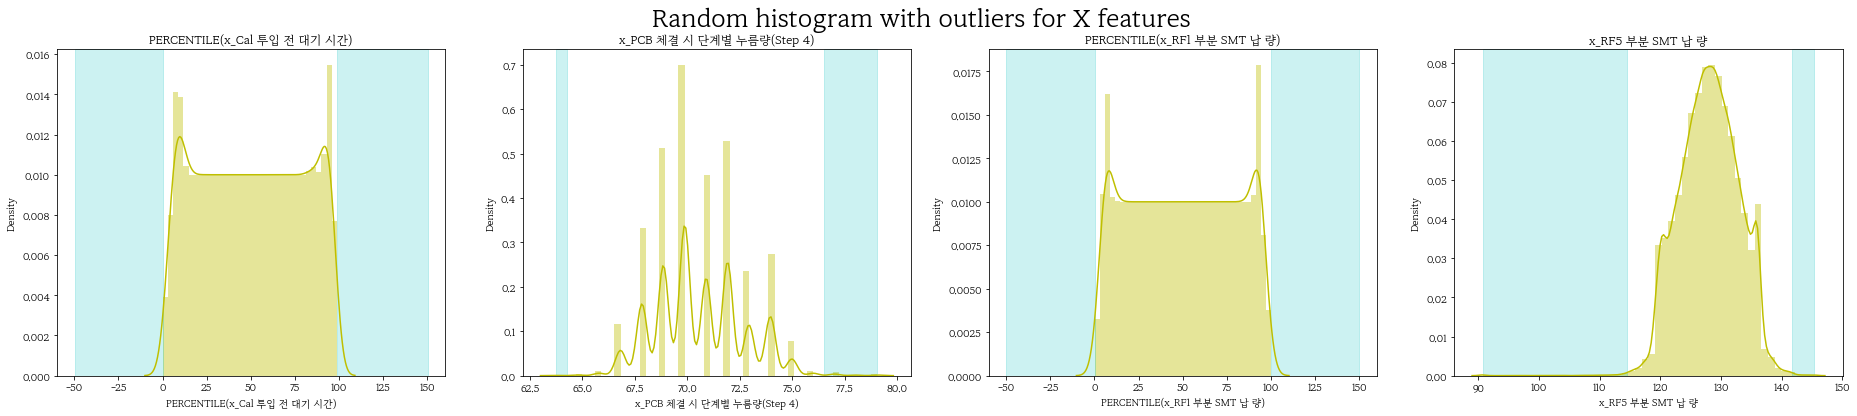

In [53]:
# 이상치 영역을 나타내는 그래프 그리기 - 랜덤하게 선별한 4개의 컬럼에 대해 다시 윈저화 후 이상치 영역 확인

fig, (ax1, ax2, ax3, ax4)= plt.subplots(1, 4, figsize=(32, 6))

fig.suptitle('Random histogram with outliers for X features', fontsize=25)

rc1 = rc[0]
lower, upper = check_outlier(fm_df, rc1)

# 컬럼별 데이터 분포 확인하기
sns.distplot(fm_df.iloc[:, rc1], color = 'y', ax = ax1)

# 이상치 영역 박스 그리기
ax1.axvspan(lower, fm_df.iloc[:, rc1].min(), alpha=0.2, color='c')
ax1.axvspan(upper, fm_df.iloc[:, rc1].max(), alpha=0.2, color='c')
ax1.set_title(fm_df.columns[rc1])


rc2= rc[1]
lower, upper = check_outlier(fm_df, rc2)

sns.distplot(fm_df.iloc[:, rc2], color = 'y', ax = ax2)

ax2.axvspan(lower, fm_df.iloc[:, rc2].min(), alpha=0.2, color='c')
ax2.axvspan(upper, fm_df.iloc[:, rc2].max(), alpha=0.2, color='c')
ax2.set_title(fm_df.columns[rc2])


rc3 = rc[2]
lower, upper = check_outlier(fm_df, rc3)

sns.distplot(fm_df.iloc[:, rc3], color = 'y', ax = ax3)

ax3.axvspan(lower, fm_df.iloc[:, rc3].min(), alpha=0.2, color='c')
ax3.axvspan(upper, fm_df.iloc[:, rc3].max(), alpha=0.2, color='c')
ax3.set_title(fm_df.columns[rc3])


rc4 = rc[3]
lower, upper = check_outlier(fm_df, rc4)

sns.distplot(fm_df.iloc[:, rc4], color = 'y', ax = ax4)

ax4.axvspan(lower, fm_df.iloc[:, rc4].min(), alpha=0.2, color='c')
ax4.axvspan(upper, fm_df.iloc[:, rc4].max(), alpha=0.2, color='c')
ax4.set_title(fm_df.columns[rc4])

plt.show()


# RF 모델로 성능확인하기

In [57]:
import random
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

In [58]:
train_x = fm_df.drop(columns = fm_df.filter(regex='y').columns, axis=1)
train_y = fm_df.filter(regex='y')

In [59]:
train_x.shape, train_y.shape

((39607, 96), (39607, 14))

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31685, 96), (7922, 96), (31685, 14), (7922, 14))

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor


seed_everything(2022)
rfr_model = RandomForestRegressor(max_depth= 30, n_estimators= 50, criterion="mse", random_state=2022)
print(rfr_model)


model = MultiOutputRegressor(rfr_model).fit(train_x, train_y)
print('Done.')

RandomForestRegressor(max_depth=30, n_estimators=50, random_state=2022)
Done.


In [63]:
print(f'R2 score of RF (training): {round(model.score(train_x, train_y), 3)}')
print(f'R2 score of RF (validation): {round(model.score(X_val, y_val), 3)}')

R2 score of RF (training): 0.86
R2 score of RF (validation): 0.861


In [64]:
# 검증데이터 및 mse 성능 확인하기
preds = model.predict(X_val)

from sklearn.metrics import mean_squared_error
print("y MSE:%.4f" % mean_squared_error(y_val, preds))
print('Done.')

y MSE:0.1728
Done.


In [65]:
# 데이콘 평가 점수 확인하기
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

print(f'lg_nrmse score of LR (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of LR (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')

lg_nrmse score of LR (training): 0.687
lg_nrmse of LR (validation): 0.683


In [70]:
len(preds_val[0])

14

In [66]:
# 평가 데이터로 데이터 예측하기

preds_test = model.predict(new_fm1)
preds_test.shape

(39608, 14)

In [72]:
len(preds_test[0])

14

In [79]:
submission = pd.read_csv('./sample_submission.csv')

for idx, col in enumerate(submission.columns):
    if col=='ID': fm_df.index
    submission[col] = preds_test[:,idx-1]
# submission.drop(columns=submission.columns[1:], axis=1, inplace=True)

submission.to_csv('./submit_RF_after_treating_outliers2.csv', index=False, encoding='utf-8')
print('Done.')

Done.


In [80]:
pd.read_csv('./submit_RF_after_treating_outliers2.csv')

,ID,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,-25.971234,1.475306,1.126317,1.125950,14.911121,31.767773,16.948900,3.237490,-26.004910,-26.155753,-22.295860,24.577436,-26.167812,-25.967389,-25.971234
1,-26.177480,1.473880,1.173699,1.120202,13.547661,31.031656,16.720210,3.094937,-26.208542,-26.281044,-22.271463,24.399345,-26.217020,-26.158068,-26.177480
2,-26.083260,1.254900,1.096940,1.130080,12.837700,31.514640,16.845660,3.126938,-26.247500,-26.307880,-22.286440,24.452980,-26.025120,-26.180680,-26.083260
3,-25.746240,1.471465,1.069190,1.040080,15.238720,32.010320,16.901000,2.994500,-25.852620,-25.883220,-21.964159,24.686680,-25.731620,-25.775760,-25.746240
4,-25.935040,1.294280,1.043680,1.021320,14.423840,32.040660,17.034840,3.075220,-25.997910,-25.836880,-22.004740,24.611000,-25.817204,-25.814060,-25.935040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39603,-26.571181,1.246224,0.997241,1.062851,12.874947,30.573188,16.285737,3.163912,-26.415125,-26.575647,-22.901679,24.278568,-26.505570,-26.514977,-26.571181
39604,-26.523478,1.236606,0.830020,0.836410,14.476220,31.380713,16.646785,3.181964,-26.472100,-26.572884,-22.845913,24.267733,-26.514842,-26.436515,-26.523478
39605,-26.415487,1.397465,0.939300,0.972900,12.920634,30.888097,16.488463,3.230561,-26.447963,-26.475034,-22.866374,24.195420,-26.407970,-26.257324,-26.415487
39606,-26.374701,1.171840,0.917000,0.822980,14.334780,30.791780,16.539578,3.168017,-26.519092,-26.442352,-22.688301,24.357179,-26.389268,-26.474765,-26.374701


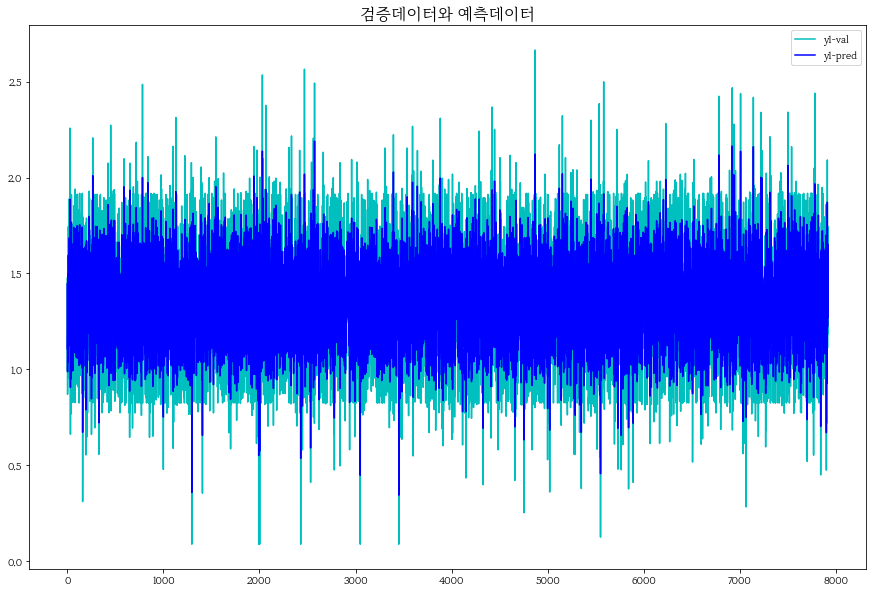

In [81]:
# 검증데이터에 대한 예측 결과  그래프를 통해 확인하기 - 첫번째 컬럼인 안테나 Gain 평균 (각도1)에 대하여 확인하기

plt.figure(figsize=(15, 10))
x_ax = range(len(X_val))
plt.plot(x_ax, y_val.iloc[:,0], label="y1-val", color='c') 
plt.plot(x_ax, preds_val[:,0], label="y1-pred", color='b')
plt.title("검증데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()